<a href="https://colab.research.google.com/github/danielmancovidales/Aplicaciones-en-salud/blob/main/analisis_exploratorio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [227]:
# Librerias generales
import pandas as pd
import numpy as np
import re
# Librerias e visualización
import seaborn as sns
import matplotlib.pyplot as plt

In [228]:
# Lectura de base de datos filtrado
from google.colab import drive
drive.mount('/content/drive')
df_filtrado= pd.read_csv('/content/drive/MyDrive/analitica3/Salud/df_filtrado.csv')
df_filtrado.drop(['Unnamed: 0'],axis=1, inplace=True)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [229]:
pd.set_option('display.max_columns', None)
df_filtrado

year_egreso mes_egreso    servicio_habilitado  nrodoc  \
0            2021      enero        general adultos  309135   
1            2021      enero   urgencias < 24 horas  309838   
2            2021      enero        general adultos  307903   
3            2021      enero        general adultos  312102   
4            2021      enero        general adultos  309271   
...           ...        ...                    ...     ...   
1494         2021  diciembre        general adultos  306990   
1495         2021  diciembre  urgencias >= 24 horas  307974   
1496         2021  diciembre   urgencias < 24 horas  306393   
1497         2021  diciembre   urgencias < 24 horas  313639   
1498         2021  diciembre   urgencias < 24 horas  310435   

     modalidad_contrato             servicio_admite via_ingreso  \
0                   pgp             hospitalizacion    remitido   
1                   pgp  urgencias generales piso 1   urgencias   
2                   pgp             hospitalizacion    remitido   
3                   pgp  urgencias generales piso 1   urgencias   
4                   pgp  urgencias generales sotano   urgencias   
...                 ...                         ...         ...   
1494                pgp  urgencias generales sotano   urgencias   
1495                pgp  urgencias generales sotano   urgencias   
1496                pgp  urgencias generales piso 1   urgencias   
1497                pgp  urgencias generales sotano   urgencias   
1498                pgp  urgencias generales sotano   urgencias   

           unidad_estrategica  tipo_egreso    fecha_ingreso_clinica  \
0     hospitalizacion adultos  Alta Medica  2021-01-01 13:51:11.210   
1                   urgencias      fallece  2021-01-01 14:40:33.160   
2     hospitalizacion adultos  Alta Medica  2021-01-01 21:03:54.097   
3     hospitalizacion adultos  Alta Medica  2021-01-02 10:45:49.520   
4     hospitalizacion adultos  Alta Medica  2021-01-02 20:16:02.040   
...                       ...          ...                      ...   
1494  hospitalizacion adultos  Alta Medica  2021-12-27 17:34:39.907   
1495                urgencias  Alta Medica  2021-12-27 21:23:00.583   
1496                urgencias      fallece  2021-12-28 12:28:26.687   
1497                urgencias      fallece  2021-12-31 10:12:19.143   
1498                urgencias      fallece  2021-12-31 17:27:17.290   

     transfusion_sangre antibiotico alta_medica     posible_alta  \
0                    no          no          si  sin informacion   
1                    no          si          si  sin informacion   
2                    no          no          si  sin informacion   
3                    no          no          si  sin informacion   
4                    no          no          si  sin informacion   
...                 ...         ...         ...              ...   
1494                 no          no          si  sin informacion   
1495                 no          no          si  sin informacion   
1496                 no          no          si  sin informacion   
1497                 no          no          si  sin informacion   
1498                 no          no          si  sin informacion   

                                     dxprincipal_egreso  \
0                           covid-19 virus identificado   
1                        covid-19 virus no identificado   
2                           covid-19 virus identificado   
3     infarto agudo del miocardio  sin otra especifi...   
4                                          invaginacion   
...                                                 ...   
1494  enfermedad cardiorrenal hipertensiva con insuf...   
1495   embolia y trombosis de otras venas especificadas   
1496                     covid-19 virus no identificado   
1497                               otras hipoglicemias    
1498  infarto agudo del miocardio  sin otra especifi...   

                                        dx_relacionado1  \
0     

In [230]:
df_filtrado.columns

Index(['year_egreso', 'mes_egreso', 'servicio_habilitado', 'nrodoc',
       'modalidad_contrato', 'servicio_admite', 'via_ingreso',
       'unidad_estrategica', 'tipo_egreso', 'fecha_ingreso_clinica',
       'transfusion_sangre', 'antibiotico', 'alta_medica', 'posible_alta',
       'dxprincipal_egreso', 'dx_relacionado1', 'dx_relacionado2',
       'dx_relacionado3', 'tipo_diagnostico_principal',
       'dx_principal_egreso_categoria', 'dx_principal_egreso_capitulo',
       'causa_basica_muerte', 'causa_basica_categoria',
       'causa_basica_capitulo', 'profesional_especialidad_grd',
       'tiempo_estancia', 'year_enfermedad', 'mes_enfermedad', 'peso', 'talla',
       'imc', 'clasificacion_imc', 'saturacion_de_oxigeno_(%)',
       'perimetro_muslo', 'perimetro_cintura', 'pliegue_triceps',
       'pliegue_abdomen', 'pliegue_muslo', 'sumatoria_pliegues',
       'presion_arterial_sistolica', 'presion_arterial_diastolica',
       'frecuencia_cardiaca_en_reposo', 'auto-calificacion_nivel_d

In [231]:
#Consulta para saber cuántas variables hay por cada tipo
df_filtrado.dtypes.value_counts()

object     58
float64    28
int64      12
Name: count, dtype: int64

In [232]:
df_filtrado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1499 entries, 0 to 1498
Data columns (total 98 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   year_egreso                                1499 non-null   int64  
 1   mes_egreso                                 1499 non-null   object 
 2   servicio_habilitado                        1499 non-null   object 
 3   nrodoc                                     1499 non-null   int64  
 4   modalidad_contrato                         1499 non-null   object 
 5   servicio_admite                            1499 non-null   object 
 6   via_ingreso                                1499 non-null   object 
 7   unidad_estrategica                         1499 non-null   object 
 8   tipo_egreso                                1499 non-null   object 
 9   fecha_ingreso_clinica                      1499 non-null   object 
 10  transfusion_sangre      

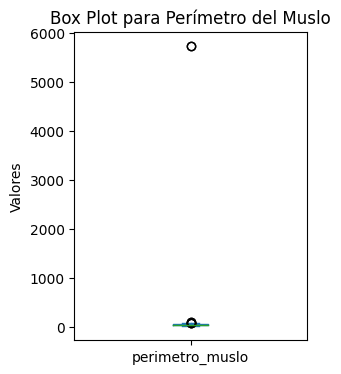

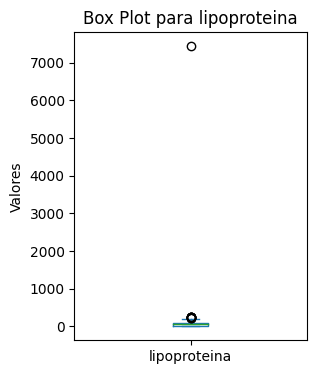

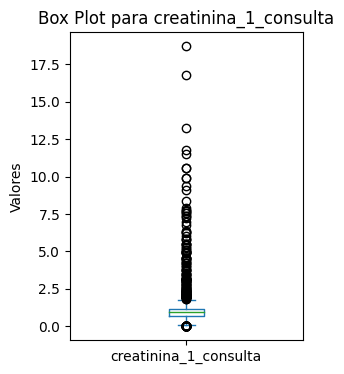

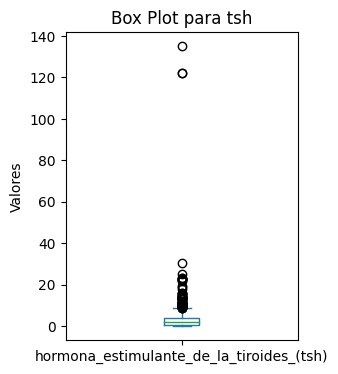

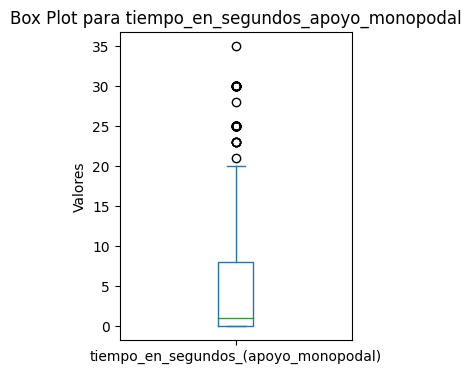

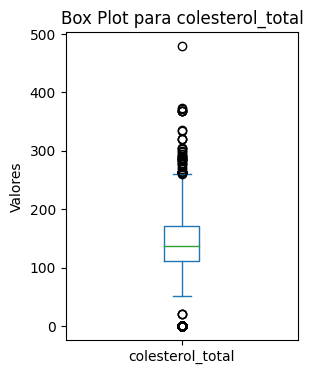

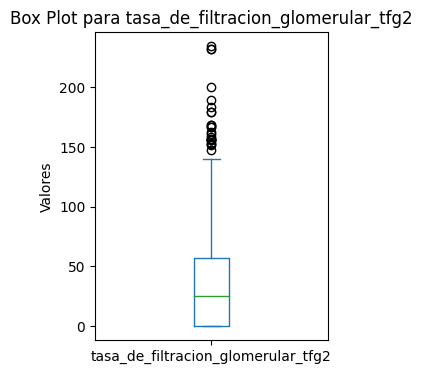

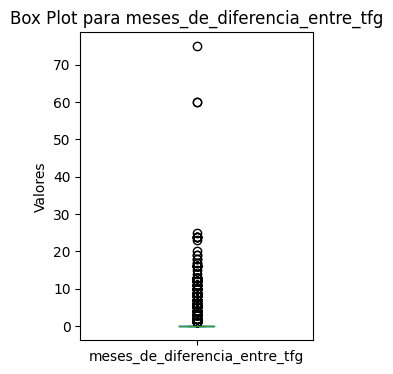

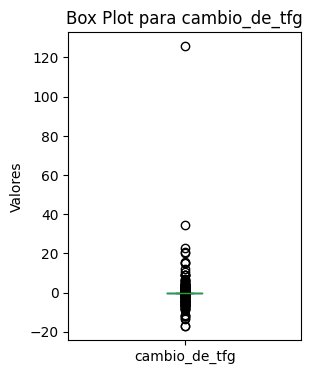

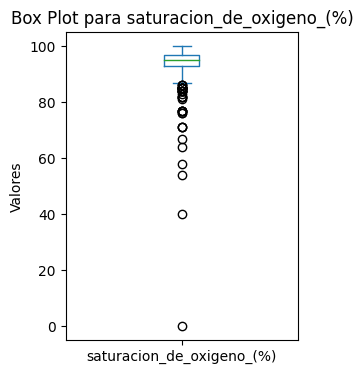

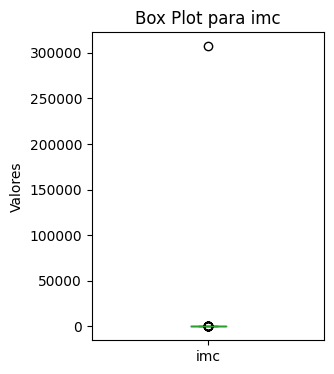

In [233]:
# Gráficos de BOX-PLOT para algunas variables numéricas (Con datos atipicos)

df_filtrado['perimetro_muslo'].plot.box(figsize=(3, 4))
plt.title('Box Plot para Perímetro del Muslo')
plt.ylabel('Valores')
plt.show()

df_filtrado['lipoproteina' ].plot.box(figsize=(3, 4))
plt.title('Box Plot para lipoproteina')
plt.ylabel('Valores')
plt.show()

df_filtrado['creatinina_1_consulta' ].plot.box(figsize=(3, 4))
plt.title('Box Plot para creatinina_1_consulta')
plt.ylabel('Valores')
plt.show()

df_filtrado['hormona_estimulante_de_la_tiroides_(tsh)' ].plot.box(figsize=(3, 4))
plt.title('Box Plot para tsh')
plt.ylabel('Valores')
plt.show()

df_filtrado['tiempo_en_segundos_(apoyo_monopodal)' ].plot.box(figsize=(3, 4))
plt.title('Box Plot para tiempo_en_segundos_apoyo_monopodal')
plt.ylabel('Valores')
plt.show()

df_filtrado['colesterol_total' ].plot.box(figsize=(3, 4))
plt.title('Box Plot para colesterol_total')
plt.ylabel('Valores')
plt.show()

df_filtrado['tasa_de_filtracion_glomerular_tfg2' ].plot.box(figsize=(3, 4))
plt.title('Box Plot para tasa_de_filtracion_glomerular_tfg2')
plt.ylabel('Valores')
plt.show()

df_filtrado['meses_de_diferencia_entre_tfg' ].plot.box(figsize=(3, 4))
plt.title('Box Plot para meses_de_diferencia_entre_tfg')
plt.ylabel('Valores')
plt.show()

df_filtrado['cambio_de_tfg' ].plot.box(figsize=(3, 4))
plt.title('Box Plot para cambio_de_tfg')
plt.ylabel('Valores')
plt.show()


df_filtrado['saturacion_de_oxigeno_(%)' ].plot.box(figsize=(3, 4))
plt.title('Box Plot para saturacion_de_oxigeno_(%)')
plt.ylabel('Valores')
plt.show()

df_filtrado['imc' ].plot.box(figsize=(3, 4))
plt.title('Box Plot para imc')
plt.ylabel('Valores')
plt.show()

Se ha decidido eliminar algunas variables debido a que no aportan información tan importante para el modelo y así ahorrar esfuerzos en eliminar valores atípicos.

-**perimetro_muslo:** El perímetro del muslo es un valor sumamente aleatorio entre cada persona ya sea enferma o en perfecto estado de salud

-**tiempo_en_segundos_(apoyo_monopodal):** Ya existe una variable que clasifica el apoyo monopodal del paciente de acuerdo a este tiempo por lo que ya cumplió su objetivo dentro del caso de estudio

-**tasa_de_filtracion_glomerular_tfg2:** Ya existe una columna con una primer tfg por lo que la segunda se hace irrelevante dentro del caso de estudio

-**meses_de_diferencia_entre_tfg:** Ya existe una variable que determina el cambio entre tfg por lo que los meses de diferencia se hacen redundantes

In [234]:
df_filtrado = df_filtrado.drop(['perimetro_muslo', 'tiempo_en_segundos_(apoyo_monopodal)', 'tasa_de_filtracion_glomerular_tfg2', 'meses_de_diferencia_entre_tfg'], axis=1)

Se ha tomado la decisión de eliminar los valores atípicos de las siguientes variables, ya que podrían introducir ruido en el modelo y afectar la calidad de los resultados. La eliminación de estos valores atípicos contribuirá a un análisis más robusto y preciso.
Cabe resaltar que los valores elegidos están dados por los niveles mínimos y máximos de acuerdo a resultados de diagnósticos reales supervisados por un profesional de la salud y cualquier valor por fuera de los límites será tomado como un error de digitación.

In [235]:
# Eliminar datos atipicos
df_filtrado = df_filtrado[df_filtrado['lipoproteina'] < 6000]
df_filtrado = df_filtrado.query("0 < creatinina_1_consulta < 5")
df_filtrado = df_filtrado[df_filtrado['hormona_estimulante_de_la_tiroides_(tsh)'] < 40]
df_filtrado = df_filtrado[df_filtrado['colesterol_total'] < 300]
df_filtrado = df_filtrado[df_filtrado['cambio_de_tfg'] < 100]
df_filtrado = df_filtrado[df_filtrado['saturacion_de_oxigeno_(%)'] > 88]
df_filtrado = df_filtrado.query("10 < imc < 40")

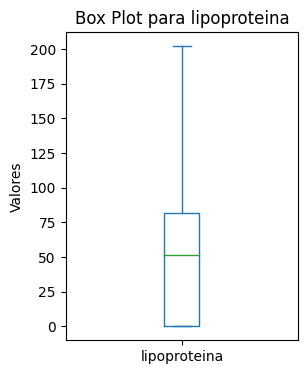

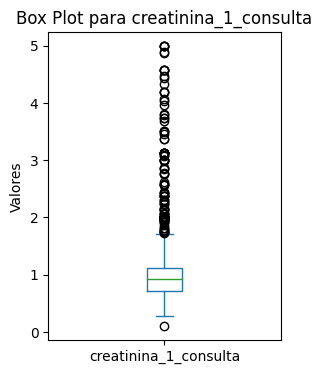

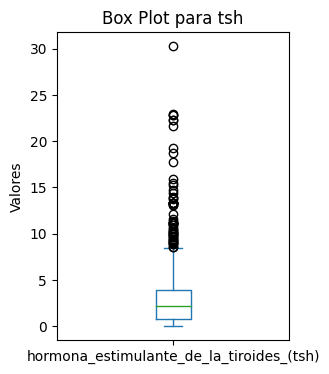

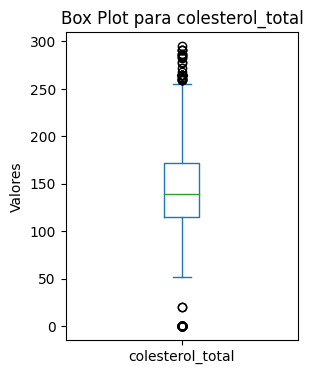

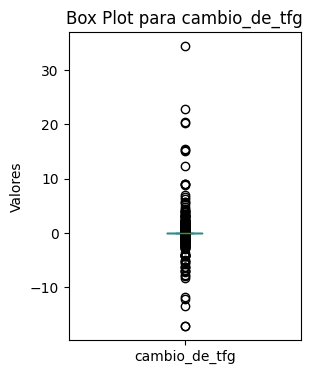

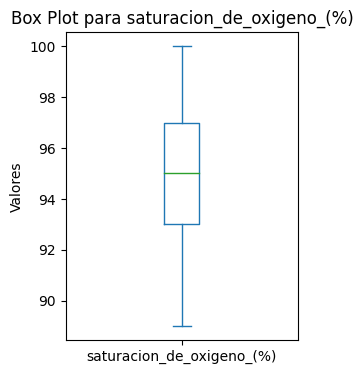

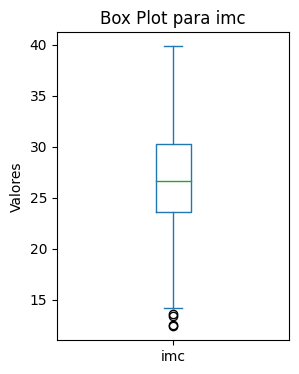

In [236]:
# Gráficos de BOX-PLOT para algunas variables numéricas sin datos atipicos

df_filtrado['lipoproteina' ].plot.box(figsize=(3, 4))
plt.title('Box Plot para lipoproteina')
plt.ylabel('Valores')
plt.show()

df_filtrado['creatinina_1_consulta' ].plot.box(figsize=(3, 4))
plt.title('Box Plot para creatinina_1_consulta')
plt.ylabel('Valores')
plt.show()

df_filtrado['hormona_estimulante_de_la_tiroides_(tsh)' ].plot.box(figsize=(3, 4))
plt.title('Box Plot para tsh')
plt.ylabel('Valores')
plt.show()


df_filtrado['colesterol_total' ].plot.box(figsize=(3, 4))
plt.title('Box Plot para colesterol_total')
plt.ylabel('Valores')
plt.show()


df_filtrado['cambio_de_tfg' ].plot.box(figsize=(3, 4))
plt.title('Box Plot para cambio_de_tfg')
plt.ylabel('Valores')
plt.show()


df_filtrado['saturacion_de_oxigeno_(%)' ].plot.box(figsize=(3, 4))
plt.title('Box Plot para saturacion_de_oxigeno_(%)')
plt.ylabel('Valores')
plt.show()

df_filtrado['imc' ].plot.box(figsize=(3, 4))
plt.title('Box Plot para imc')
plt.ylabel('Valores')
plt.show()

Se puede notar que hubo cambios significativos en algunas variables y que en otras se conservan valores atípicos pero puede deberse a que personas cerca de los extremos de los rangos están en delicado estado de salud.

In [237]:
# Se consultan las variables numéricas para ver si alguna puede ser considerada como categórica
df_filtrado.select_dtypes(include=['int64'])

year_egreso  nrodoc  year_enfermedad  presion_arterial_sistolica  \
0            2021  309135             2017                         129   
1            2021  309838             2018                         120   
2            2021  307903             2021                         174   
3            2021  312102             2018                         141   
4            2021  309271             2022                         110   
...           ...     ...              ...                         ...   
1492         2021  310672             2021                         154   
1494         2021  306990             2021                         110   
1495         2021  307974             2021                         110   
1496         2021  306393             2021                         125   
1497         2021  313639             2021                         143   

      presion_arterial_diastolica  frecuencia_cardiaca_en_reposo  \
0                              55                             71   
1                              70                             76   
2                              78                             73   
3                              68                            108   
4                              70                             74   
...                           ...                            ...   
1492                           76                             66   
1494                           70                             62   
1495                           60                             80   
1496                           71                            133   
1497                           83                             69   

      auto-calificacion_nivel_de_ejercicio  \
0                                        3   
1                                        1   
2                                        1   
3                                        1   
4                                        1   
...                                    ...   
1492                                     1   
1494                                     1   
1495                                     1   
1496                                     1   
1497                                     1   

      tiempo_en_segundos_(recorrer_5_metros)  numero_diagnosticos  \
0                                          5                    0   
1                                          5                    0   
2                                          0                    1   
3                                          3                    0   
4                                          9                    1   
...                                      ...                  ...   
1492                                       7                    3   
1494                                       0                    1   
1495                                       7                    0   
1496                                       0                    0   
1497                                       7                    2   

      year_activo_programa  
0                     2017  
1                     2017  
2                     2017  
3                     2018  
4                     2017  
...                    ...  
1492                  2017  
1494                  2017  
1495                  2017  
1496                  2017  
1497                  2021  

[1295 rows x 10 columns]

Hay algunas variables que son categorías como year_egreso, nrodoc, year_enfermedad, numero_diagnosticos y year_activo_programa por lo que se decide cambiarlas a tipo object.

También se decide eliminar variables numéricas poco relevantes para el caso de estudio como auto-calificacion_nivel_de_ejercicio y tiempo_en_segundos_(recorrer_5_metros).

In [238]:
#Cambio a tipo object
df_filtrado[["year_egreso", "nrodoc", "year_enfermedad", "numero_diagnosticos", "year_activo_programa"]] = df_filtrado[["year_egreso", "nrodoc", "year_enfermedad", "numero_diagnosticos", "year_activo_programa"]].astype(object)

#Eliminación
df_filtrado = df_filtrado.drop(["auto-calificacion_nivel_de_ejercicio", "tiempo_en_segundos_(recorrer_5_metros)"], axis=1)

In [239]:
# Se separan las variables categoricas
categoricas= df_filtrado.select_dtypes(include=['object'])

In [240]:
# Se separan las variables numericas
columnas_a_eliminar = df_filtrado.columns.intersection(categoricas.columns)

numericas = df_filtrado.drop(columns=columnas_a_eliminar)

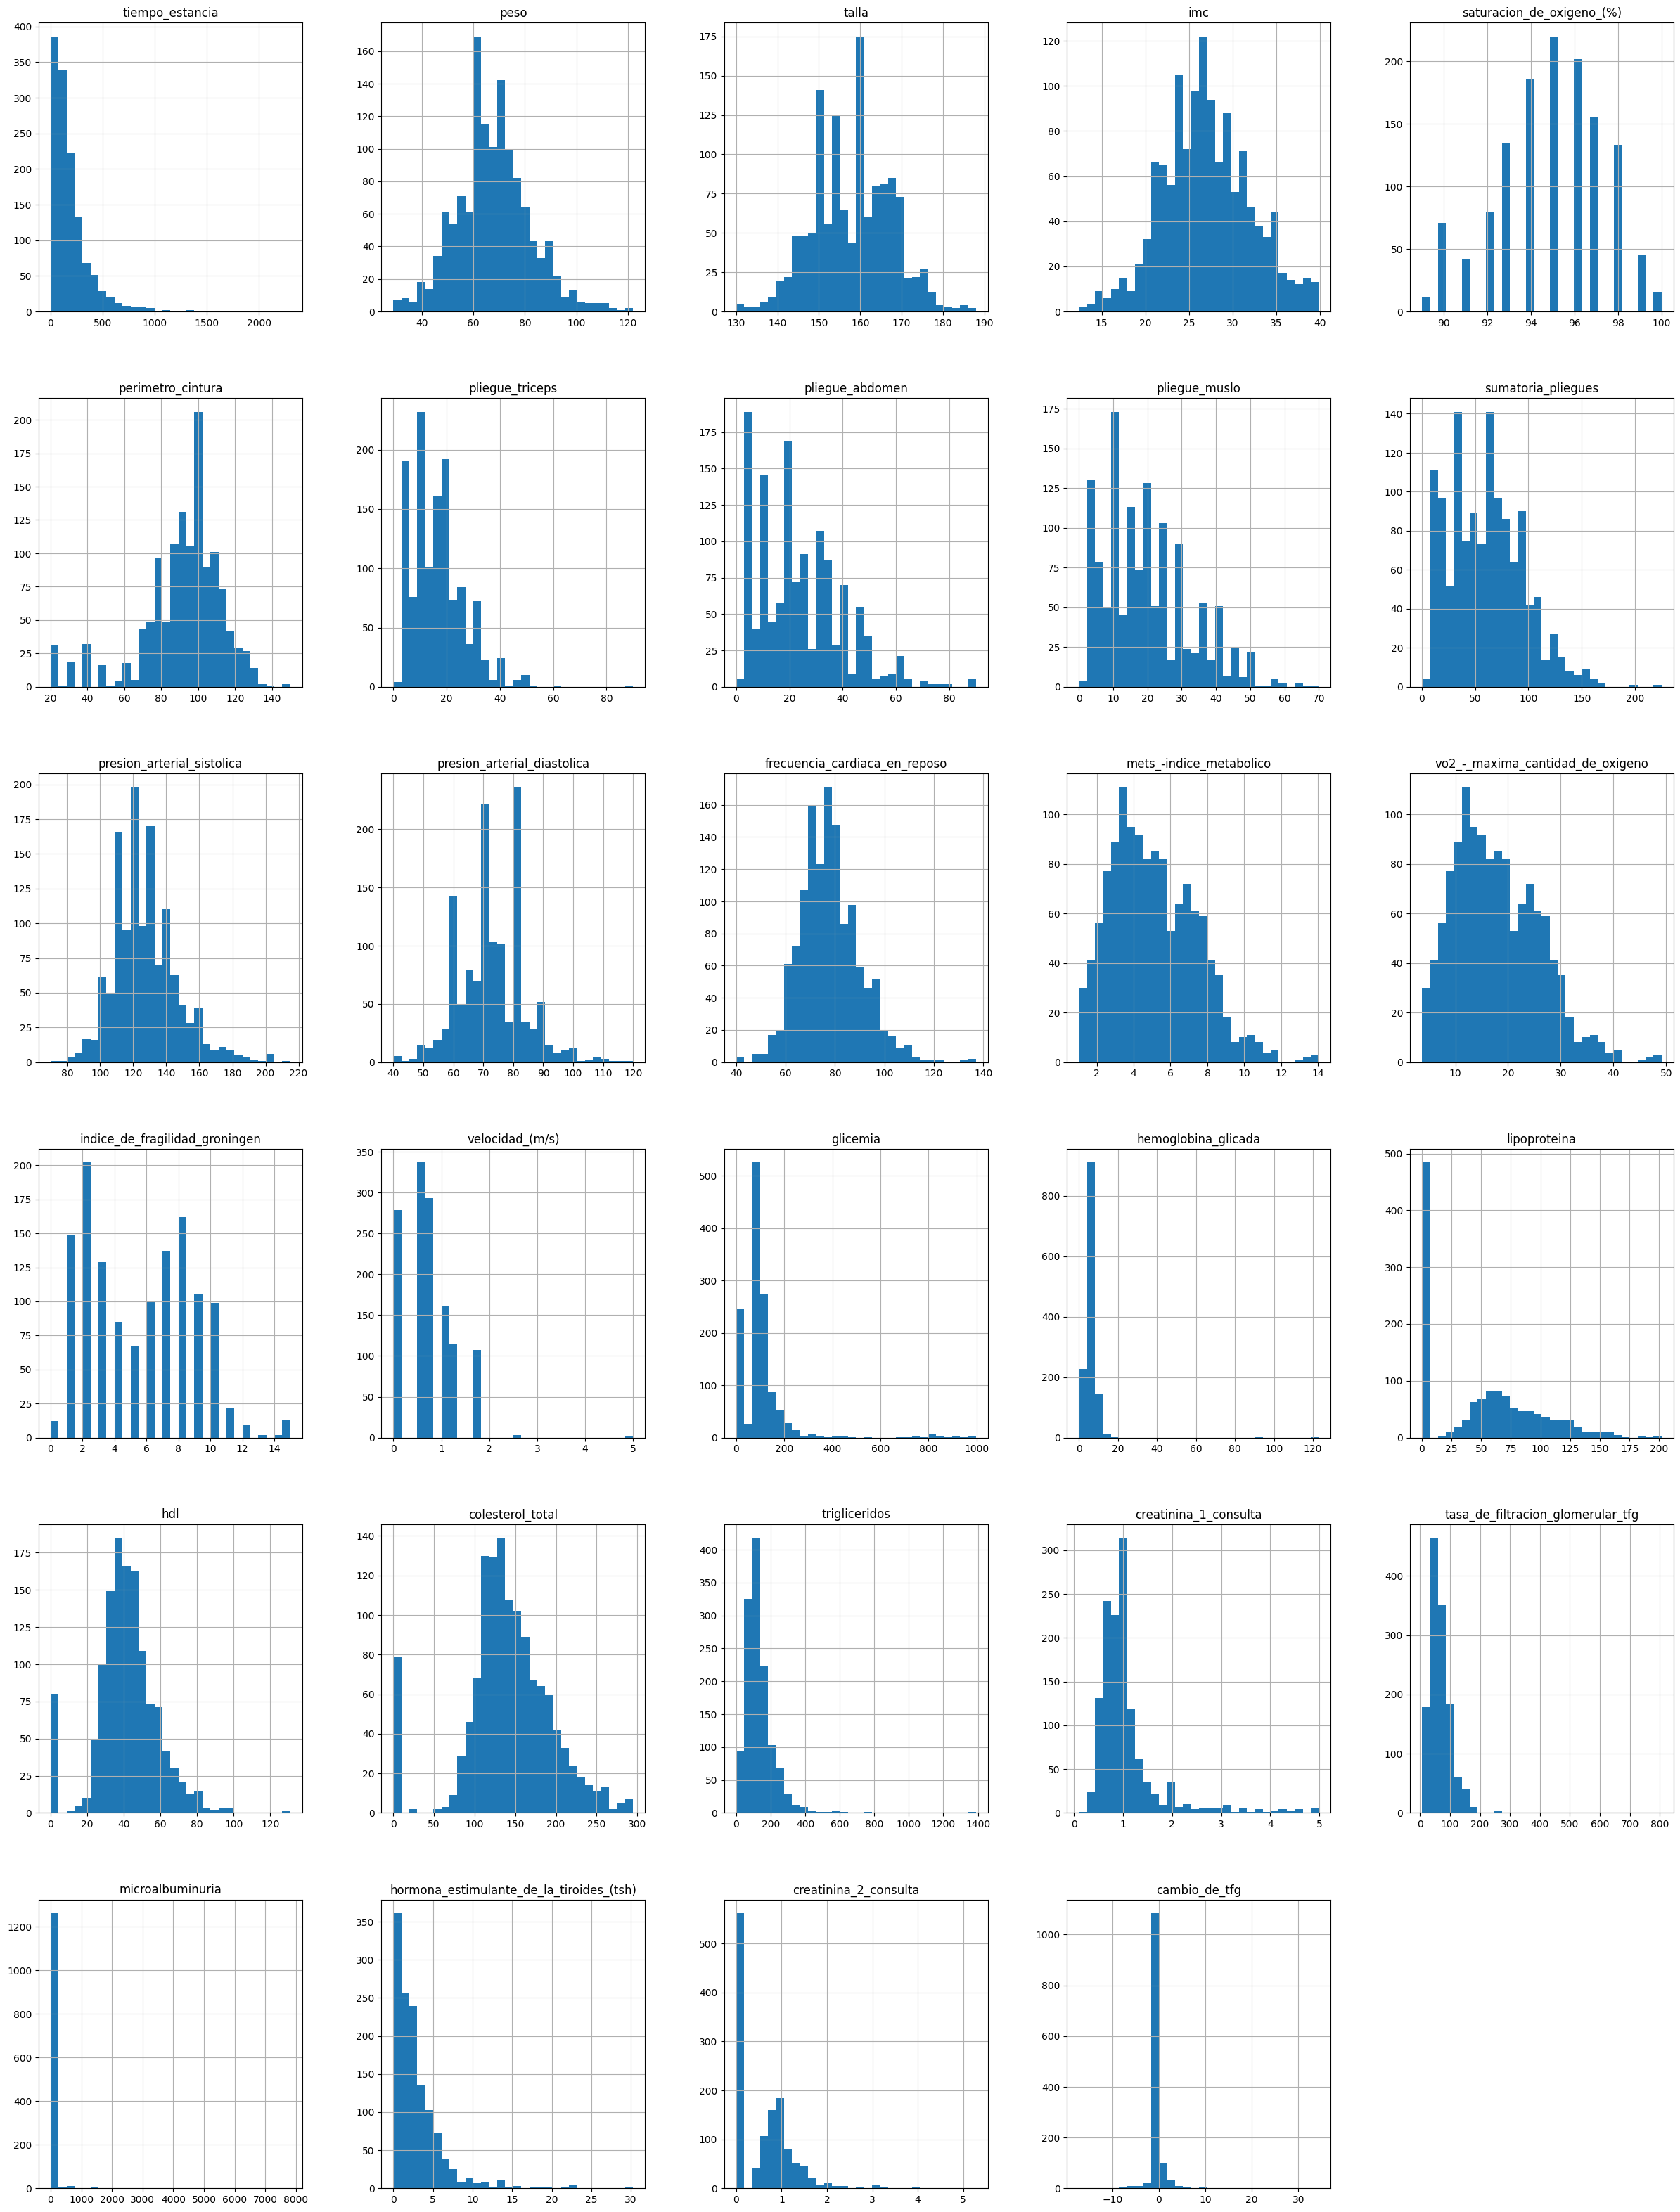

In [241]:
# Se realizan los histogramas para cada variable numérica
%matplotlib inline
numericas.hist(bins=30, figsize=(30, 40))
plt.show()

Se puede notar que muchas de las variables tienen un comportamiento aproximadamente normal. Además, algunas están sesgadas pero la razón es que las condiciones de cada paciente son específicas y hay personas que presentan un delicado estado de salud.

Por otra parte se decide seguir eliminando algunas variables que no aportan al modelo por diferentes razones como redundancia y/o poca relevancia en cuanto a la variable target que es **tiempo de estancia**.


Estas variables son:

-**perimetro_cintura, pliegue_triceps, pliegue_abdomen, pliegue_muslo, sumatoria_pliegues:** Son variables un poco "cualitativas" debido a que una persona puede tener pliegues en partes del cuerpo y estar bien de salud o no tenerlos y estar en estado grave.

-**velocidad_(m/s):** No es una variable relevante para aumentar o disminuír la estancia hospitalaria de un paciente


In [242]:
#Eliminación
numericas = numericas.drop(["perimetro_cintura", "pliegue_triceps", "pliegue_abdomen", "pliegue_muslo", "sumatoria_pliegues", "velocidad_(m/s)"], axis=1)

In [243]:
# Función para diagrama de barras

def plot_category_counts(data, column_name):
    counts = data[column_name].value_counts()
    m = pd.DataFrame({column_name: counts.index, 'Count': counts.values})
    m = m.sort_values(by=column_name)
    sns.barplot(data=m, y=column_name, x='Count')
    plt.show()

In [244]:
#Se crea una base de datos que sólo se va a usar para graficar
categoricas=categoricas.astype(str)

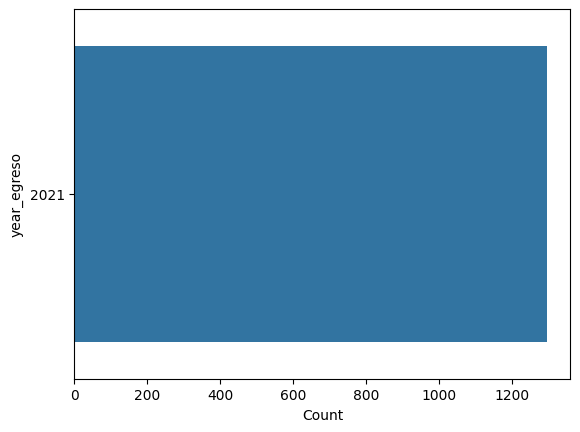

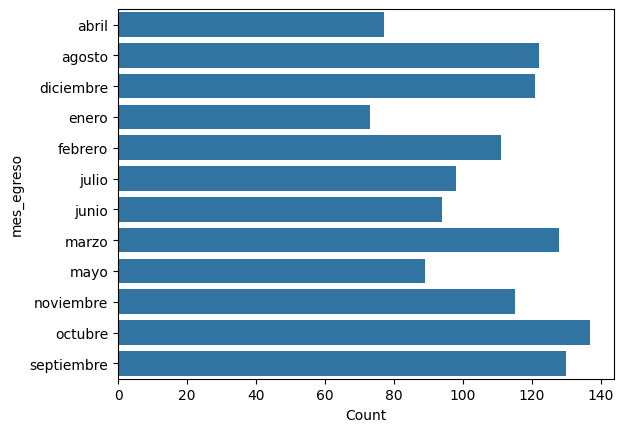

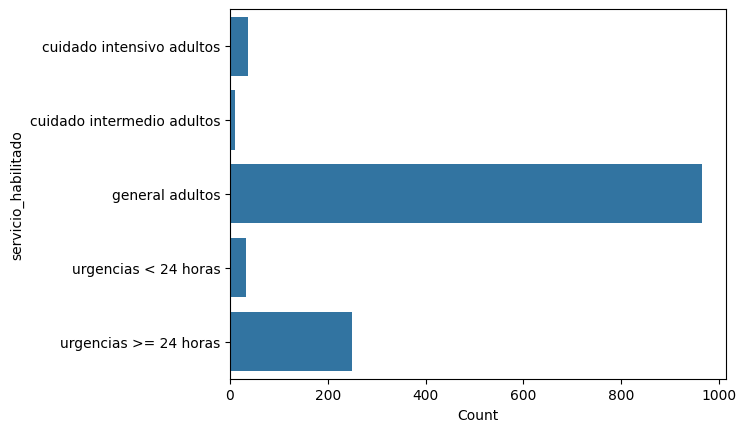

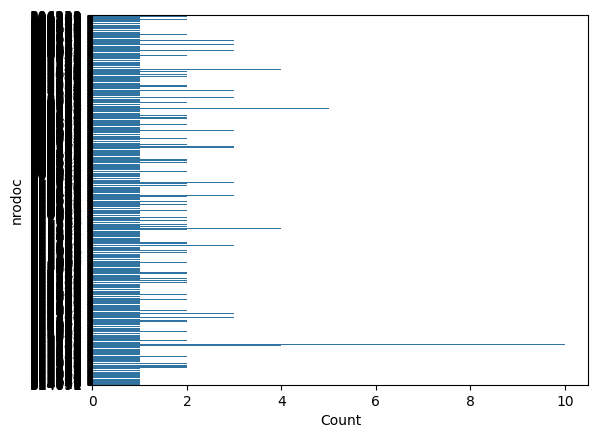

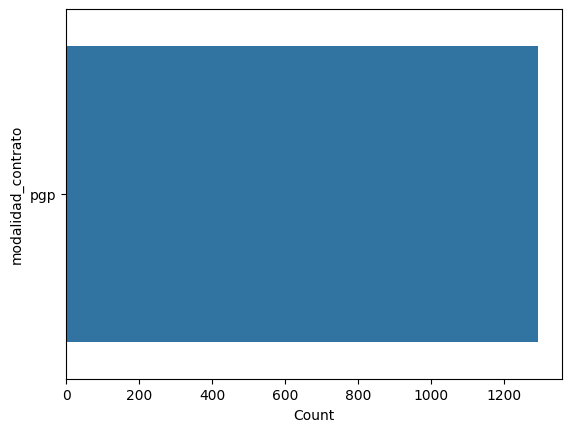

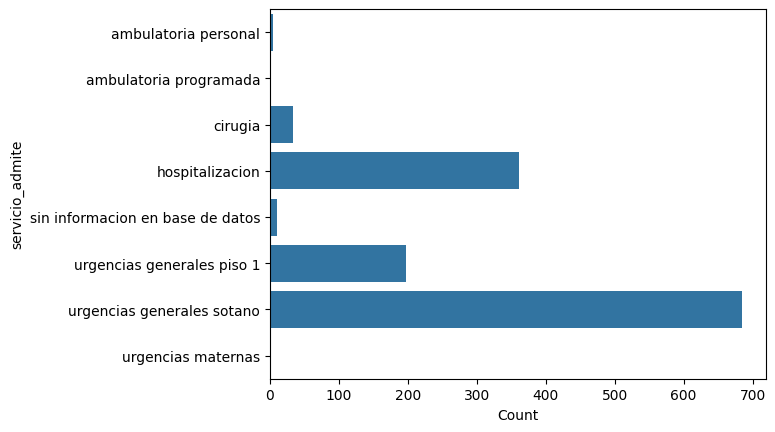

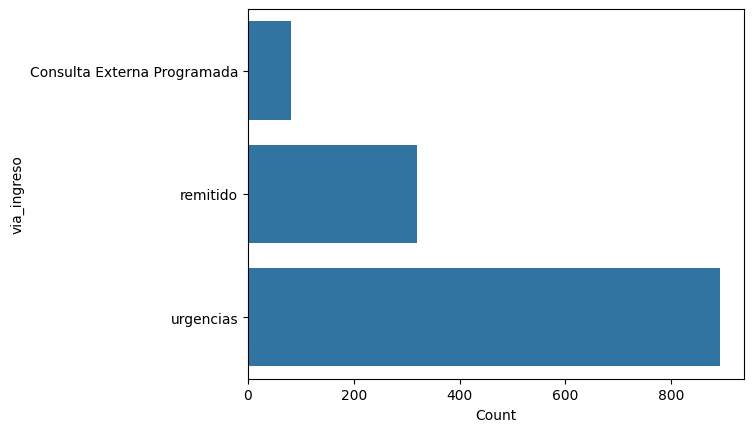

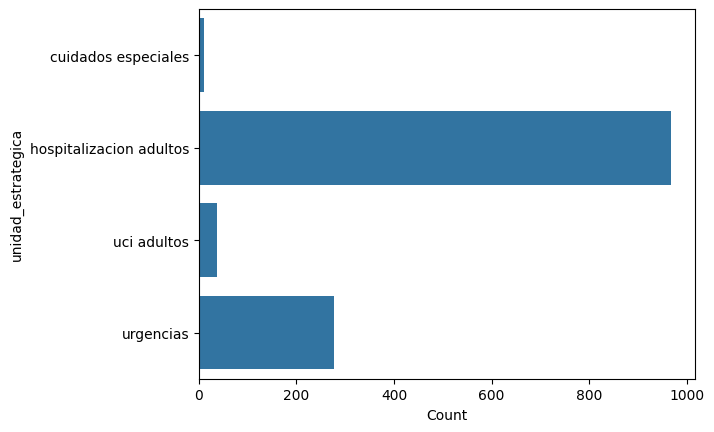

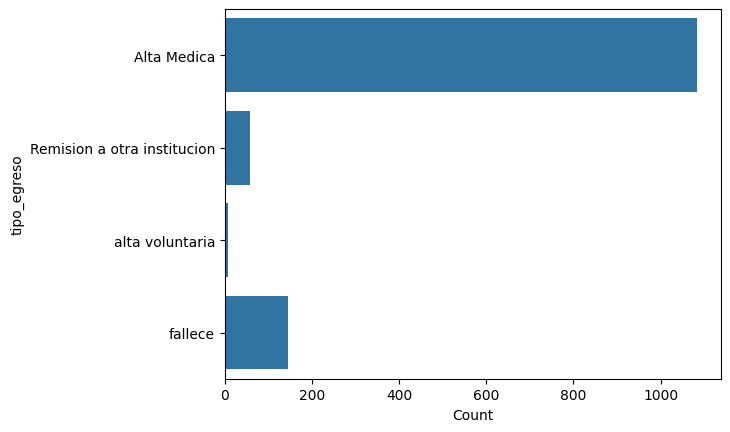

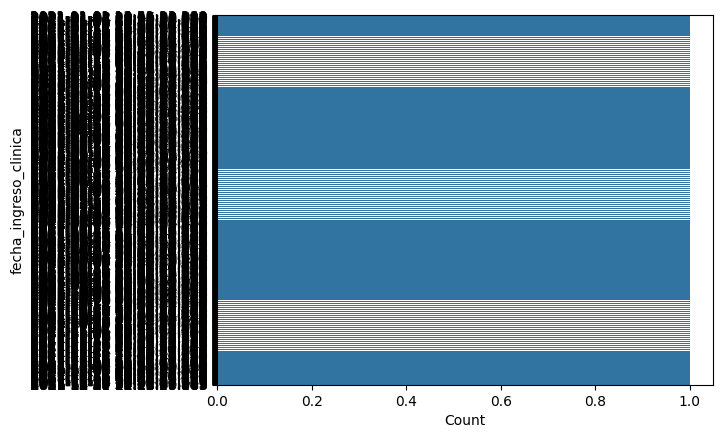

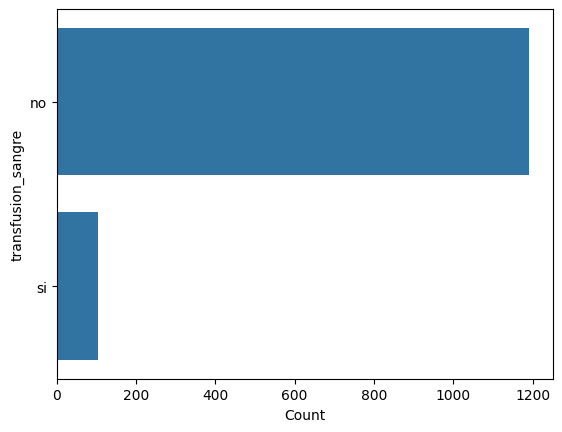

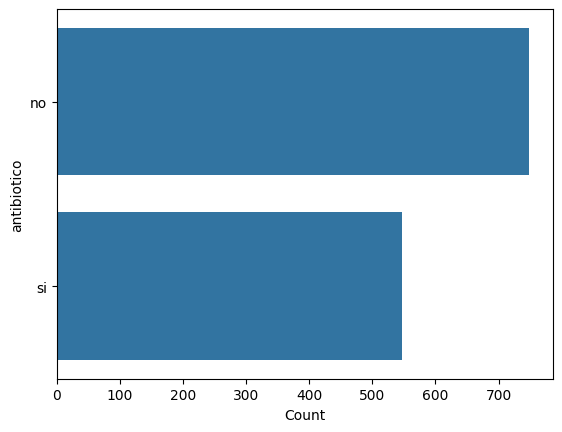

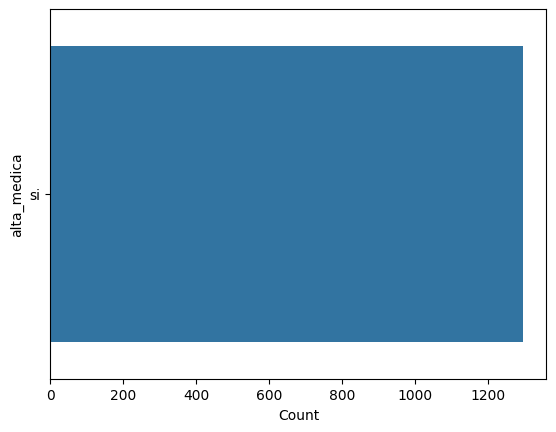

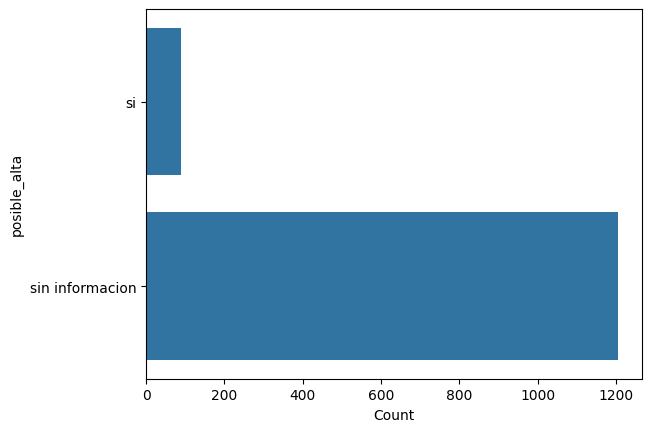

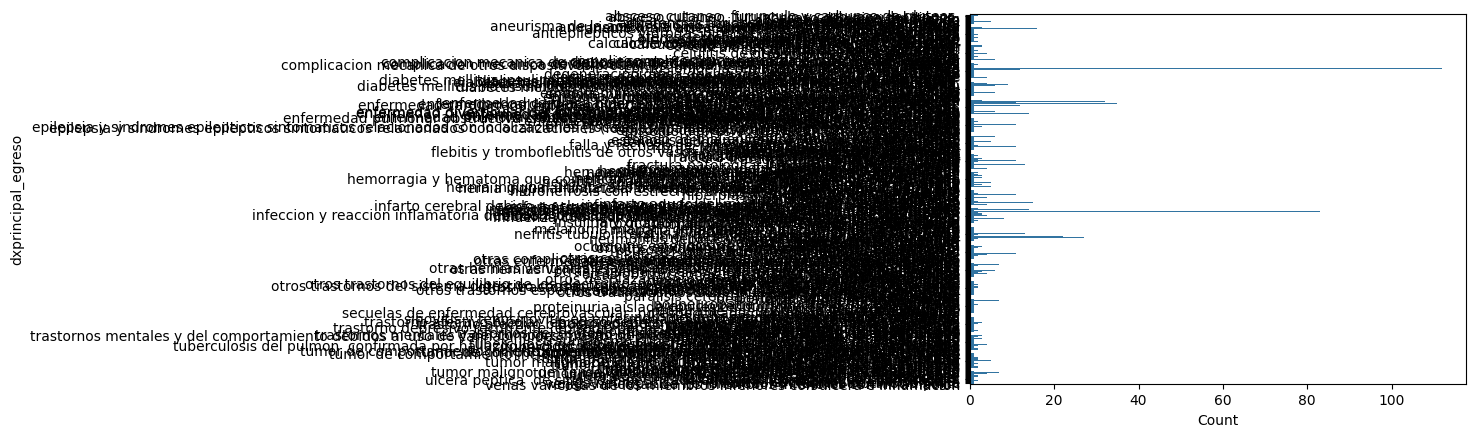

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129 (\x81) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


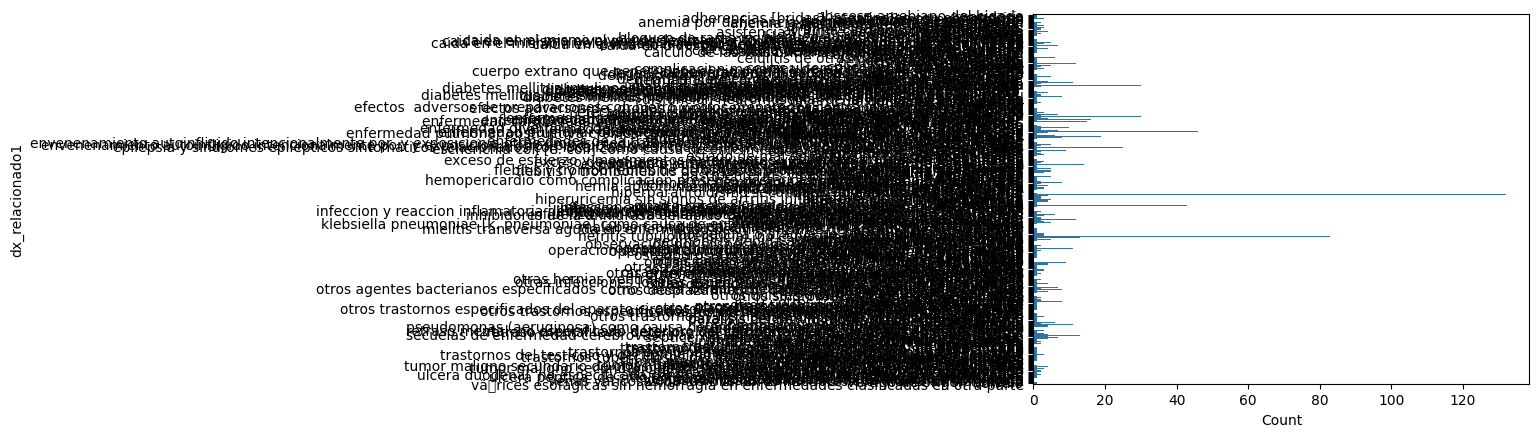

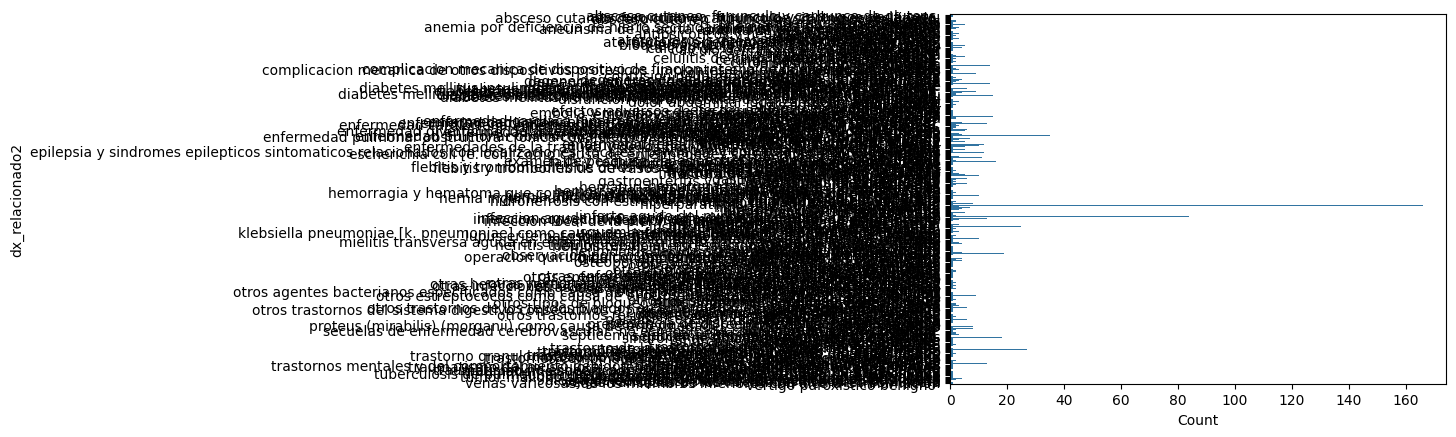

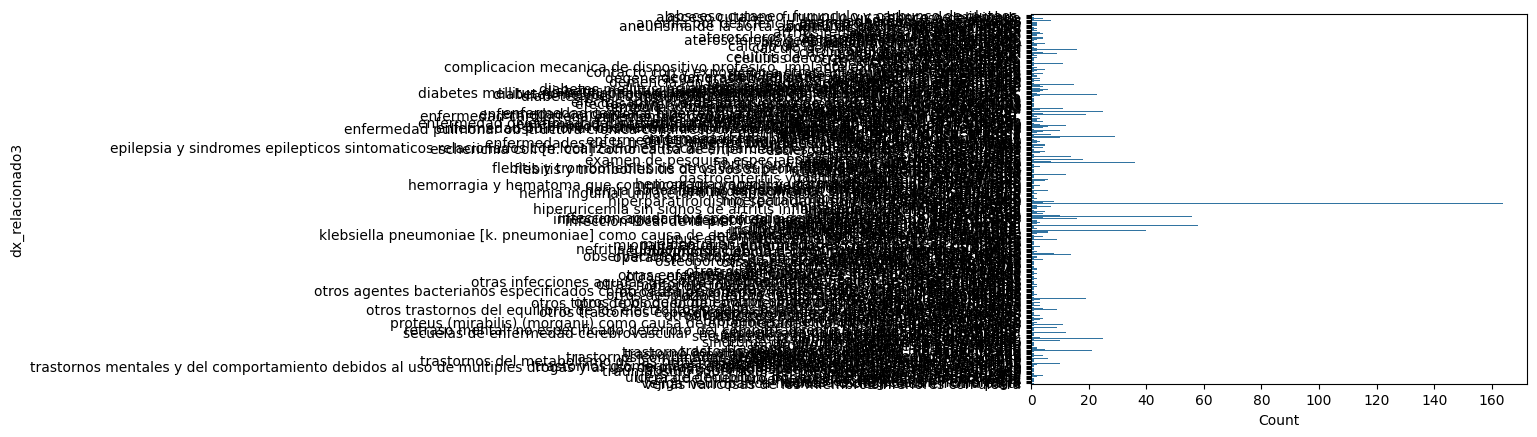

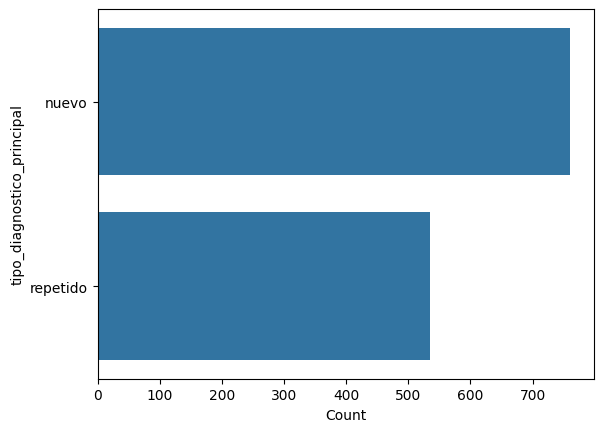

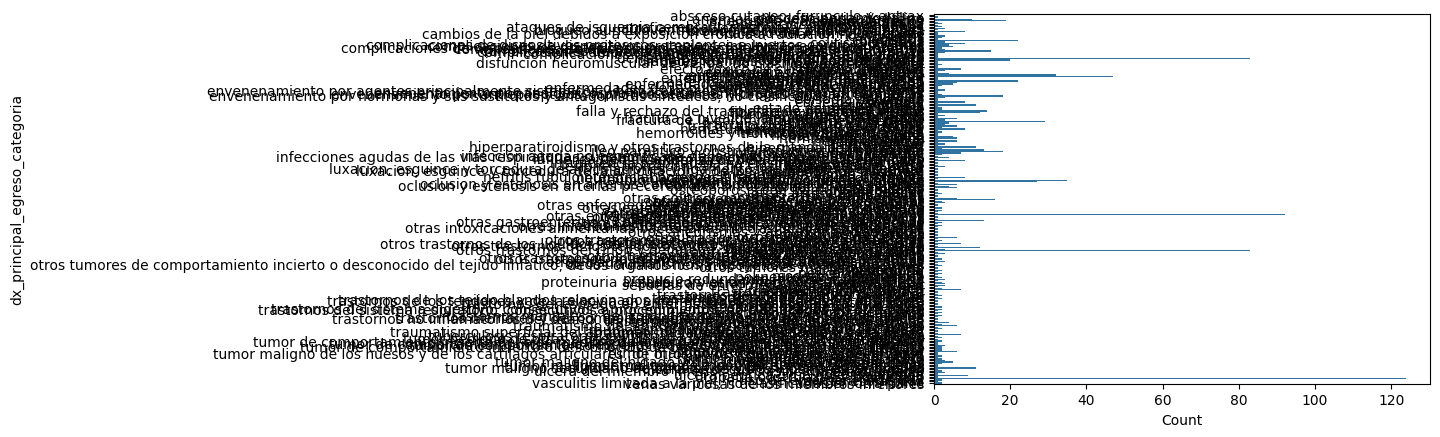

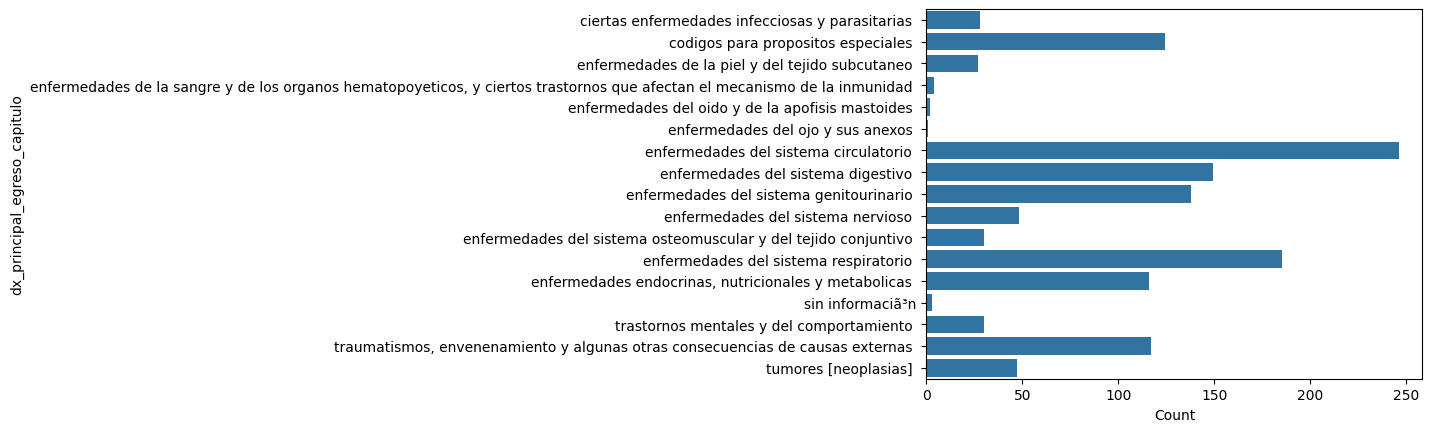

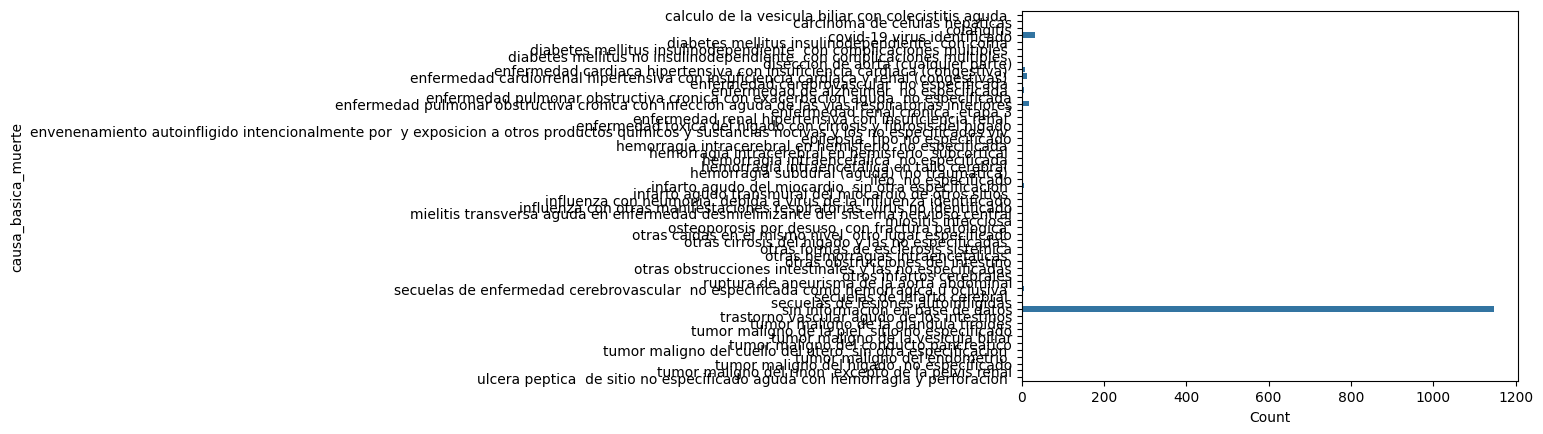

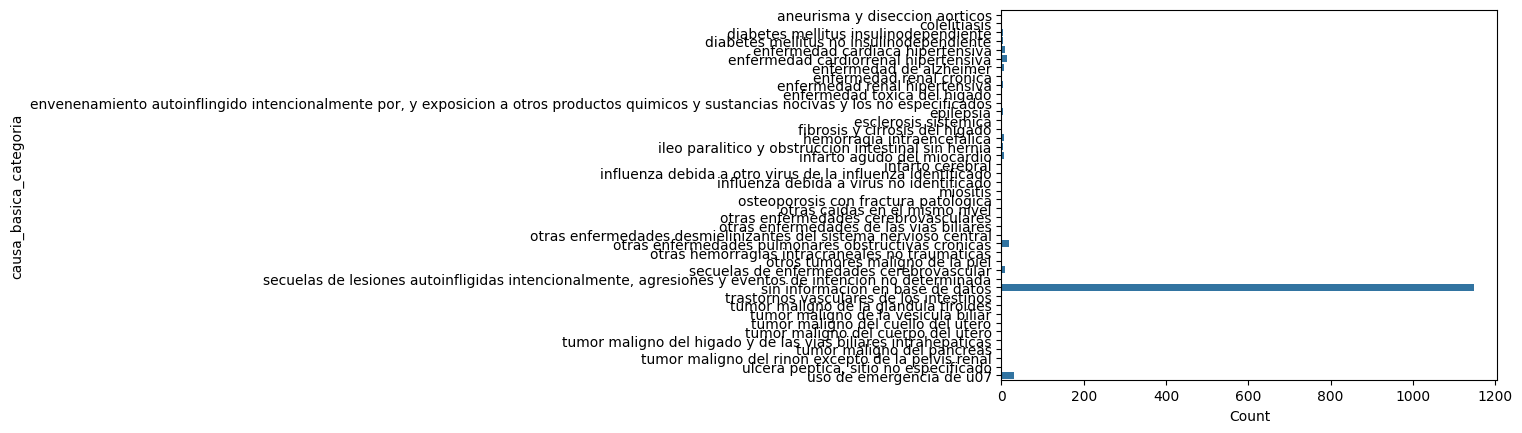

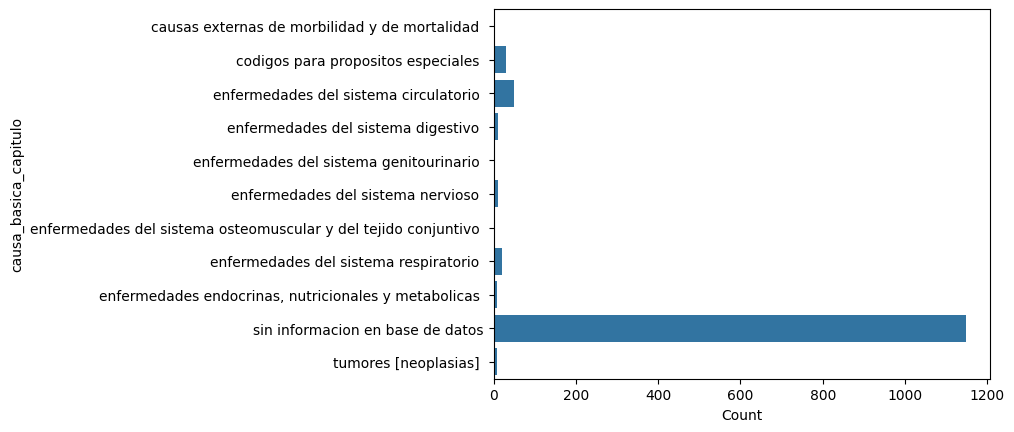

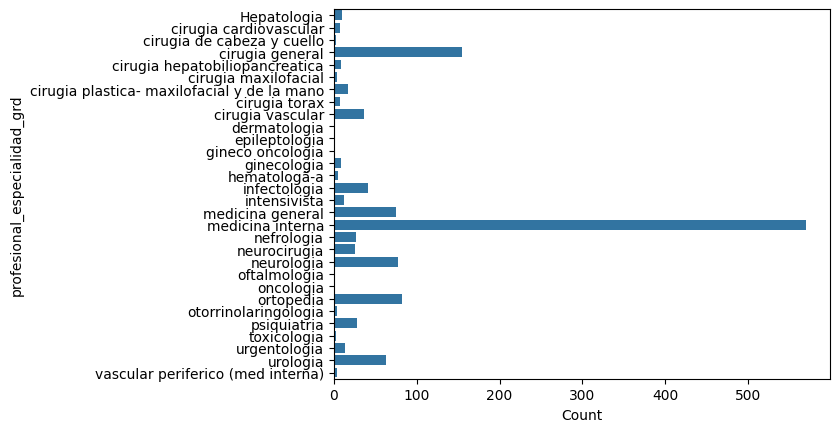

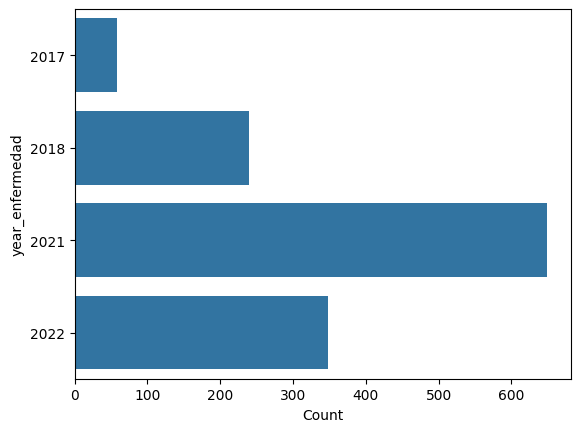

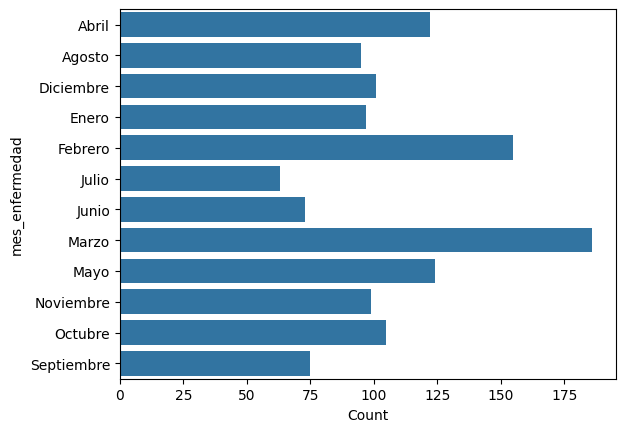

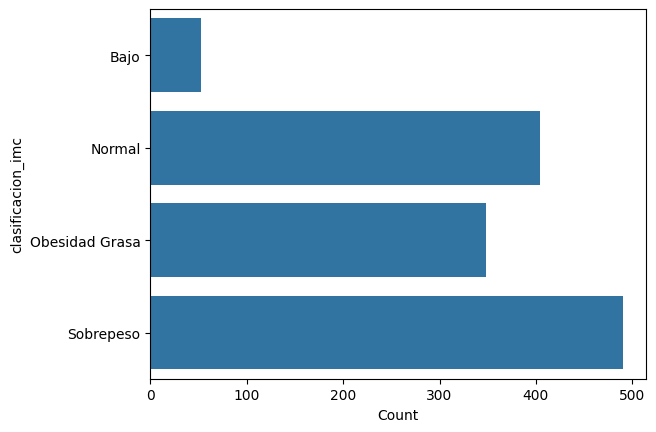

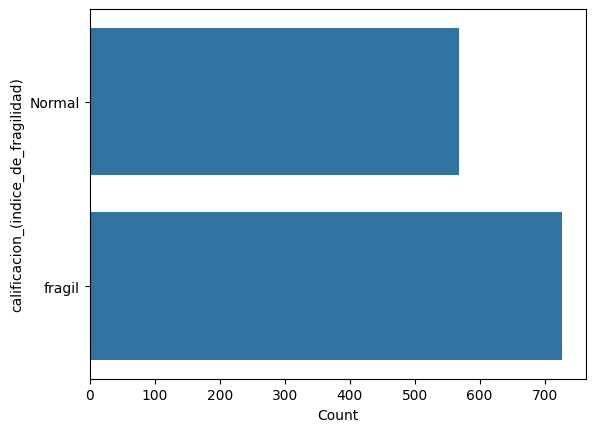

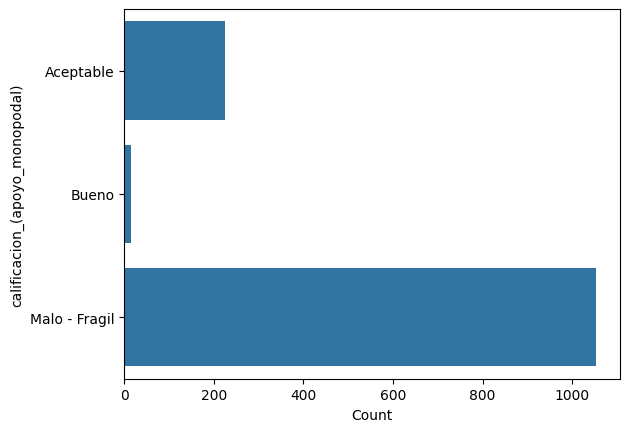

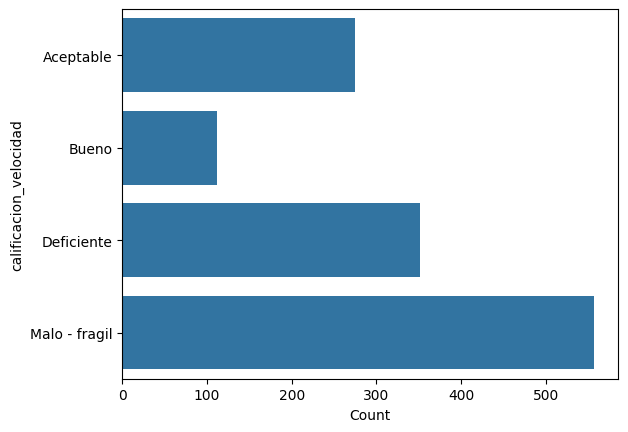

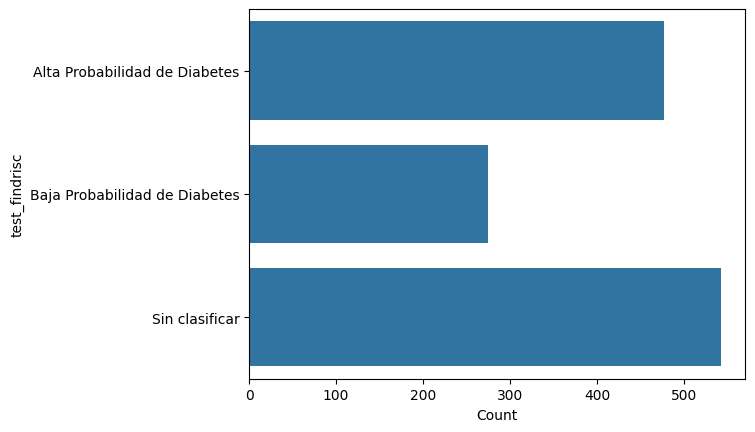

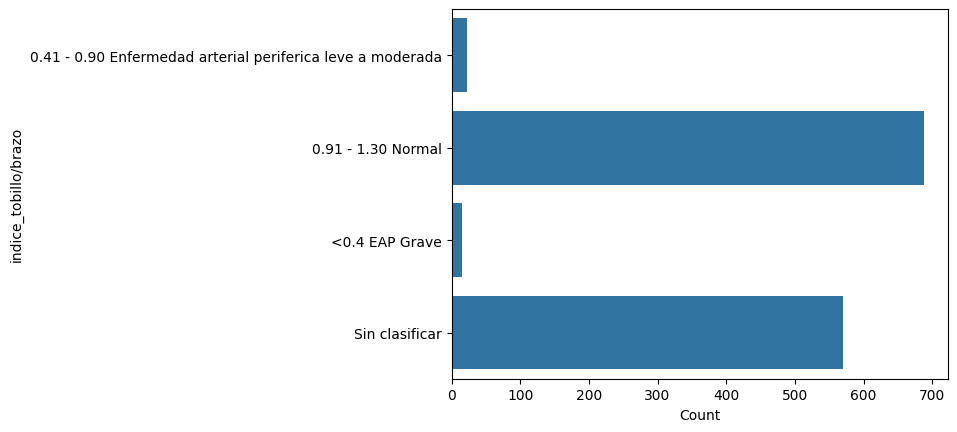

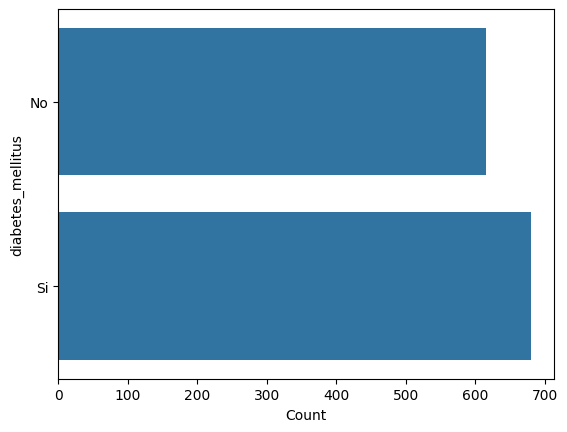

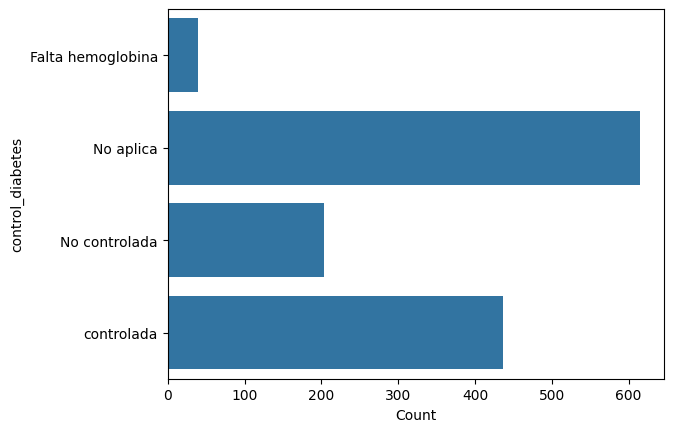

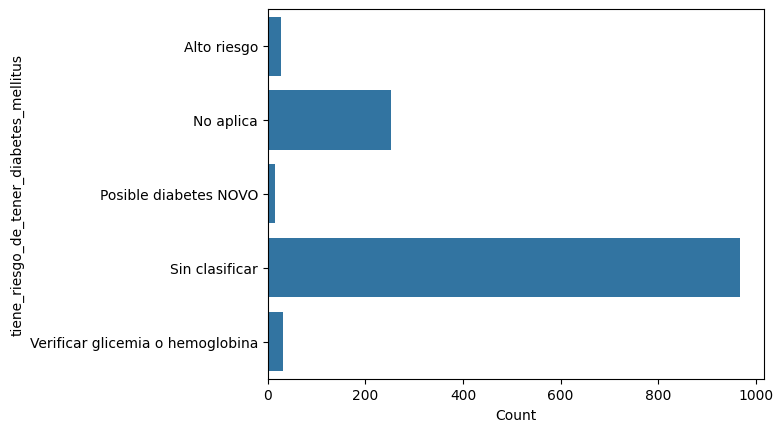

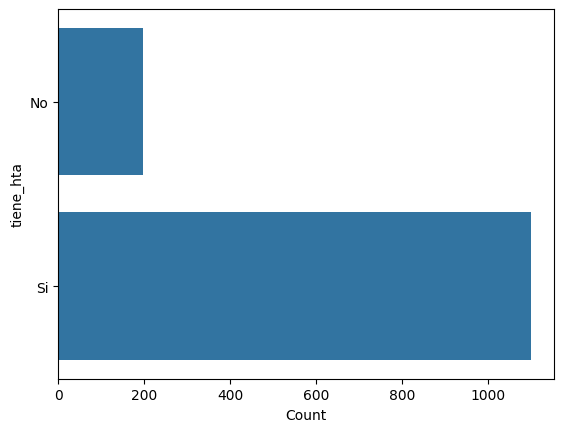

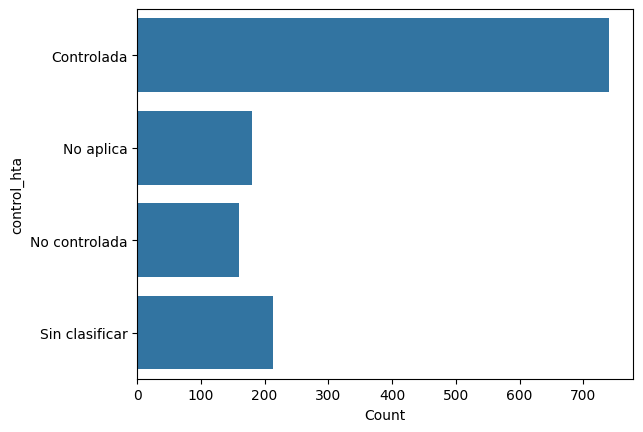

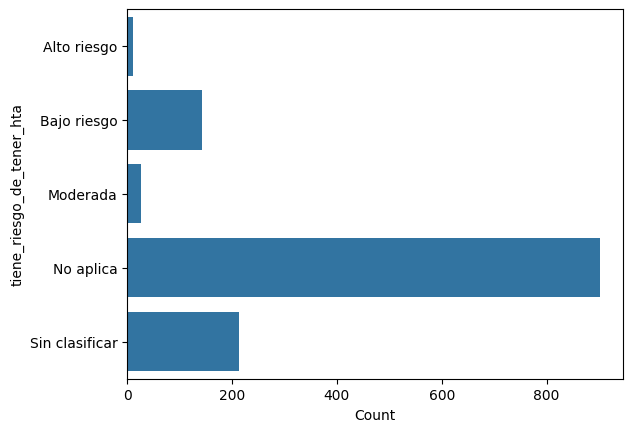

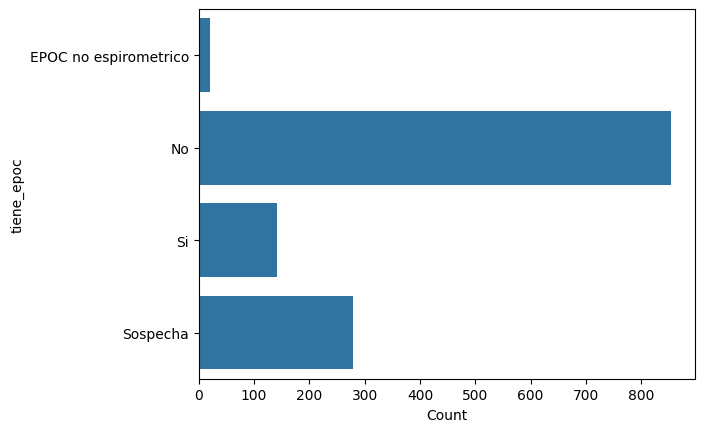

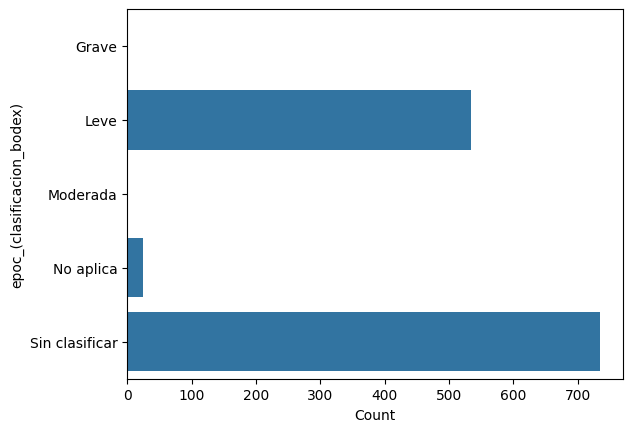

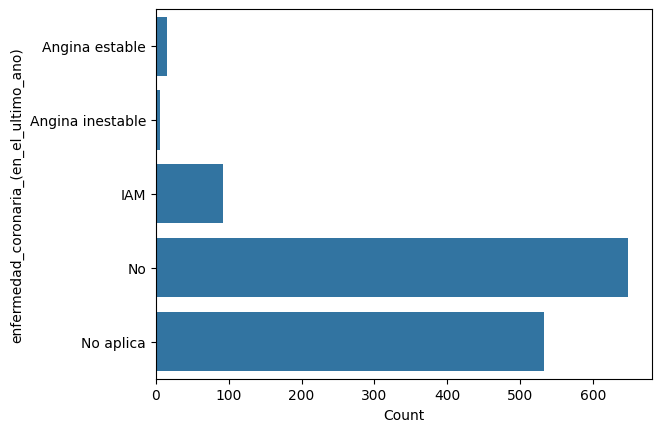

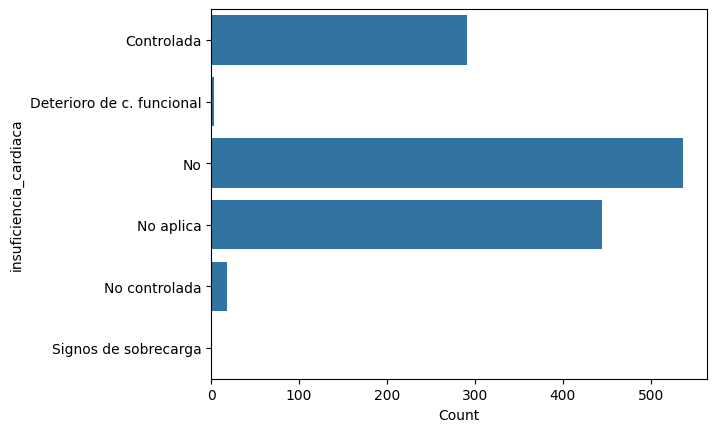

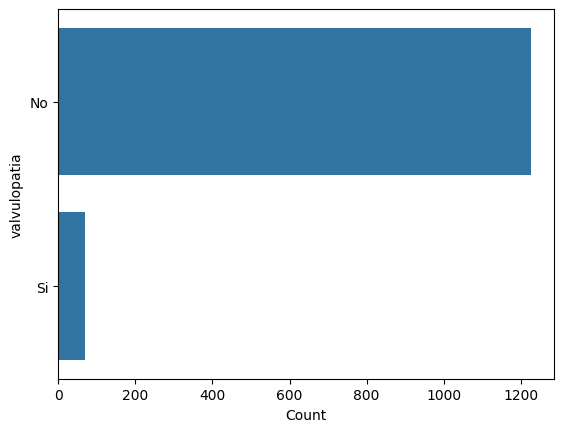

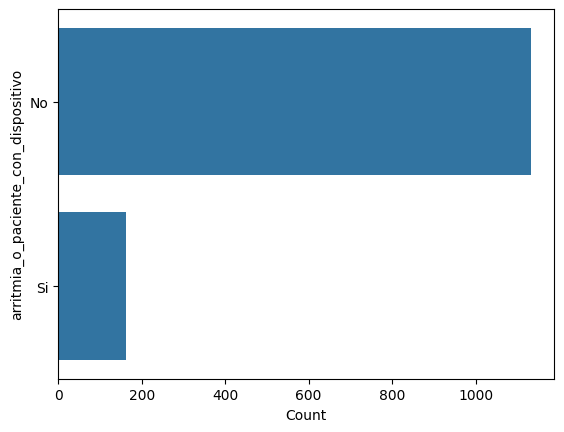

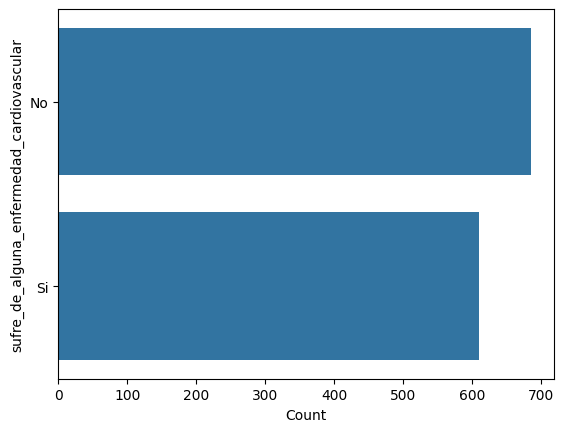

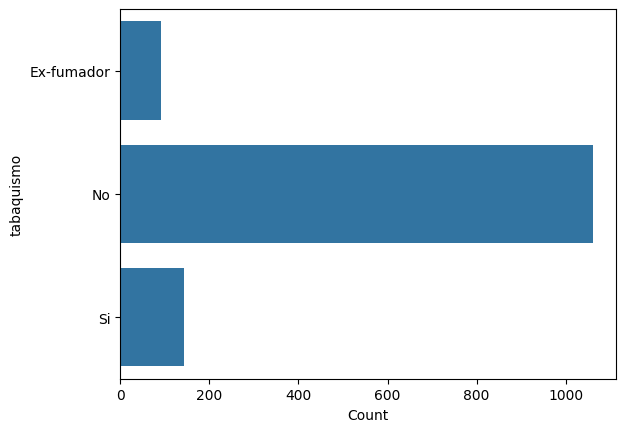

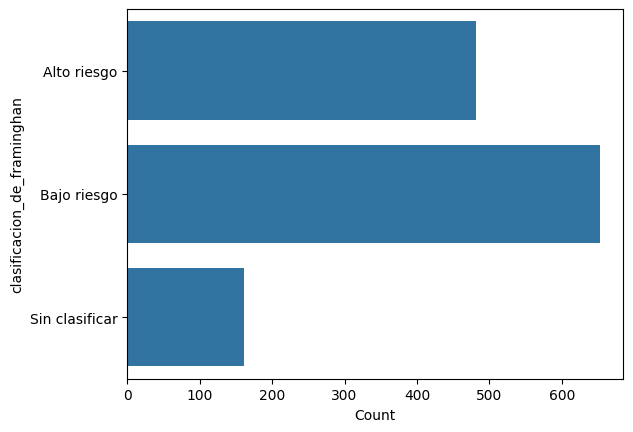

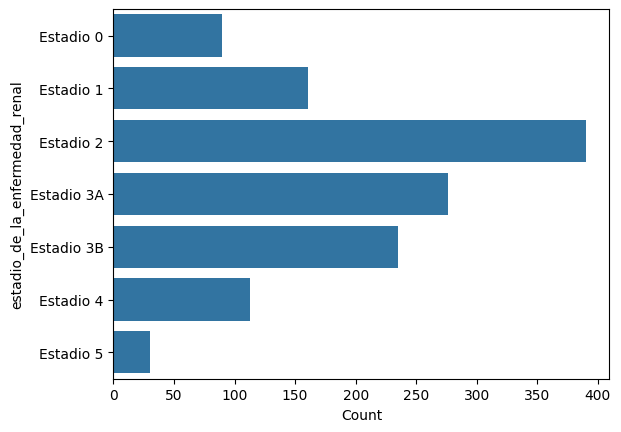

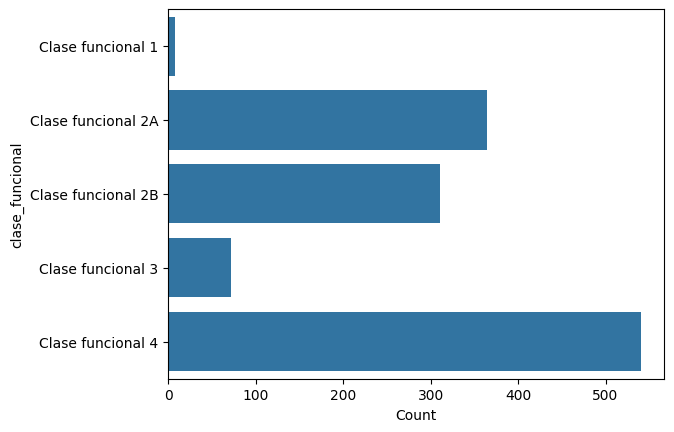

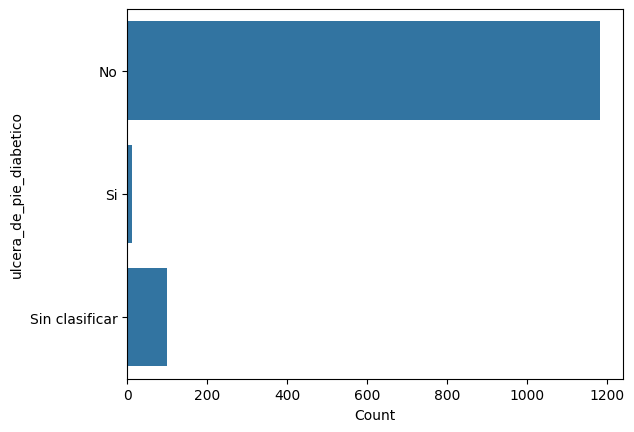

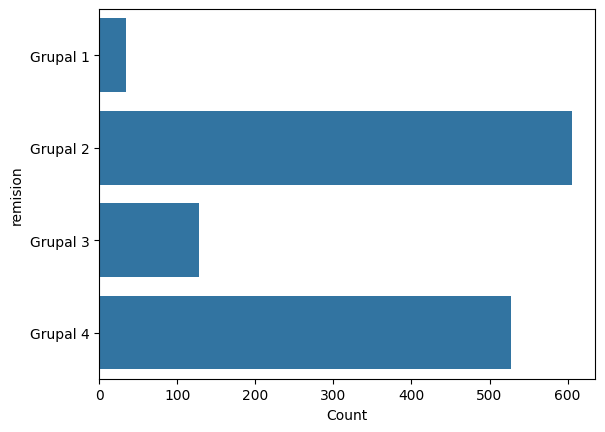

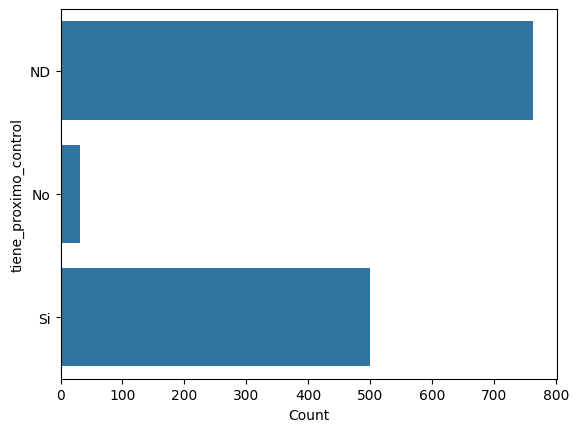

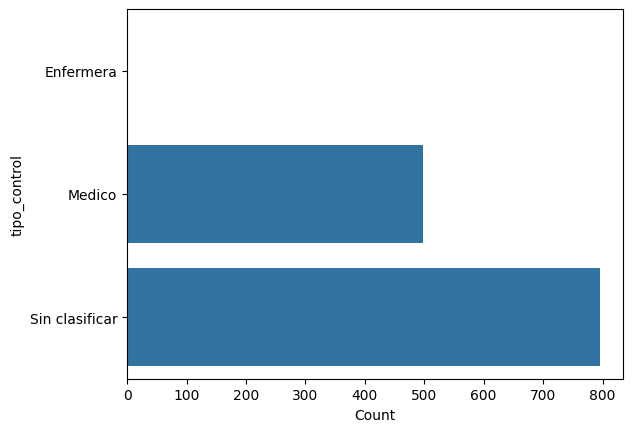

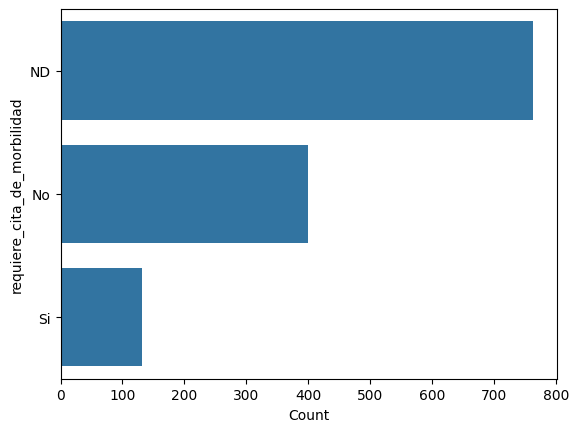

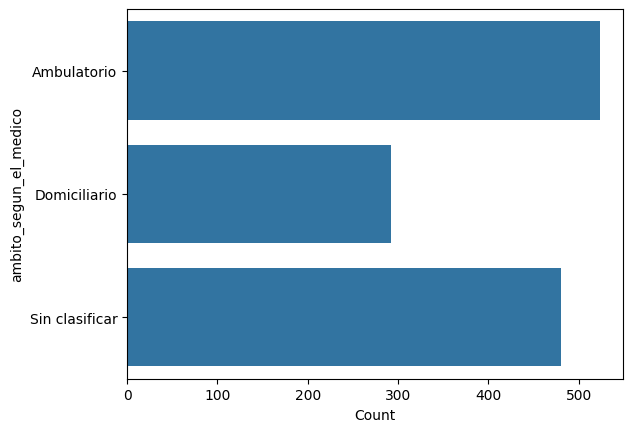

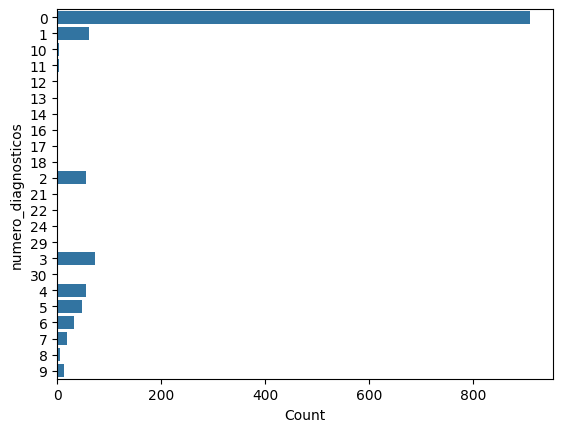

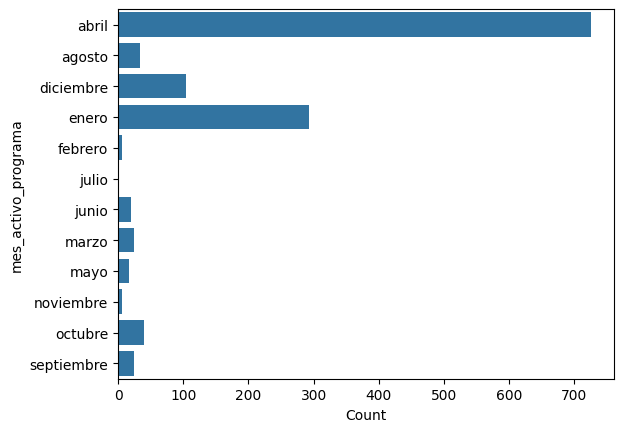

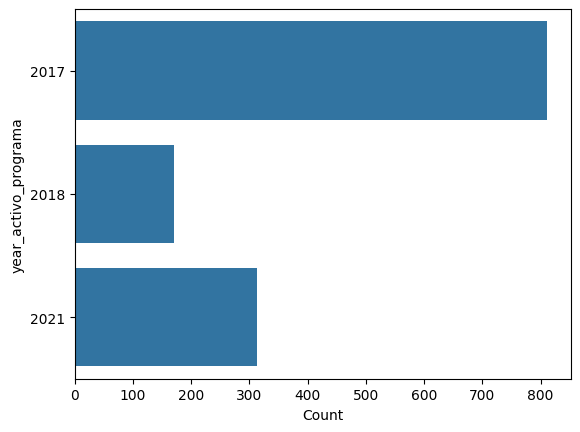

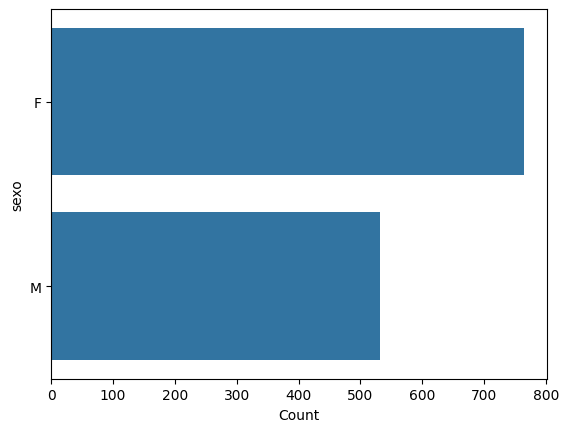

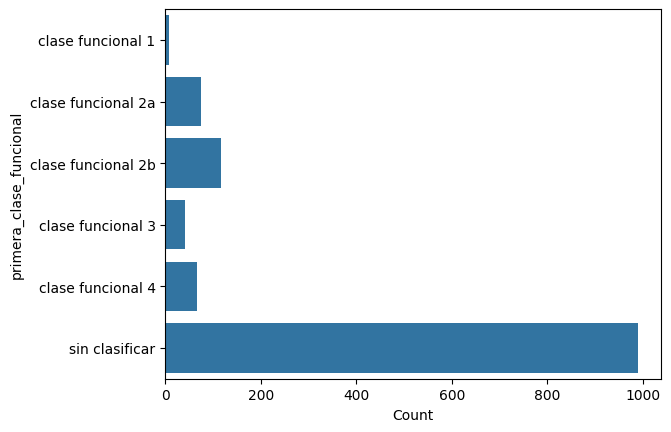

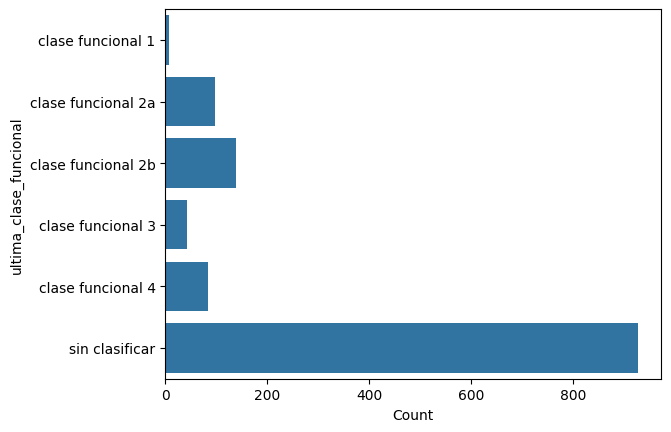

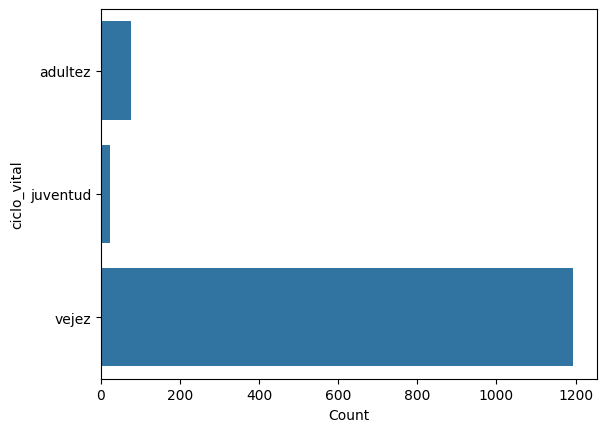

In [245]:
for column in categoricas.columns:
    plot_category_counts(categoricas, column)

Al principio se grafican variables como pgp, nrodoc o year_egreso de las cuales se debería hacer caso omiso en este análisis.

Se continua eliminando variables que son confusas en cuanto a sus valores, no aportan al modelo y son de poca relevancia para la variable target.

Estas variables son:

-**dxprincipal_egreso, dx_relacionado1, dx_relacionado2, dx_relacionado3, dx_principal_egreso_categoria, dx_principal_egreso_categoria:** Son diagnósticos cualitativos que no tienen una distribución clara debido a que cada persona los da de manera subjetiva.

-**causa_basica_muerte, causa_basica_categoria, causa_basica_capitulo, alta_medica, posible_alta:** A pesar de haber tratado los nulos anteriormente, la mayoría de filas están sin información.

-**calificacion_velocidad, indice_tobillo/brazo, tiene_proximo_control:** Son variables que no son relevantes para la estancia hospitalaria ya que una persona con poca velocidad puede estar sana y los próximos controles no garantizan enfermedad debido a que pueden ser chequeos de rutina o de prevención.



In [246]:
#Eliminación
categoricas = categoricas.drop(["dxprincipal_egreso", "dx_relacionado1", "dx_relacionado2", "dx_relacionado3",
                                "dx_principal_egreso_categoria", "dx_principal_egreso_categoria", "causa_basica_muerte",
                                "causa_basica_categoria", "causa_basica_capitulo", "alta_medica", "posible_alta",
                                "calificacion_velocidad", "indice_tobillo/brazo", "tiene_proximo_control"], axis=1)

###**Análisis de la variable target**

In [253]:
# Se selecciona la variable target
y=df_filtrado[['tiempo_estancia']]
numericas.drop(['tiempo_estancia'],axis=1,inplace=True)

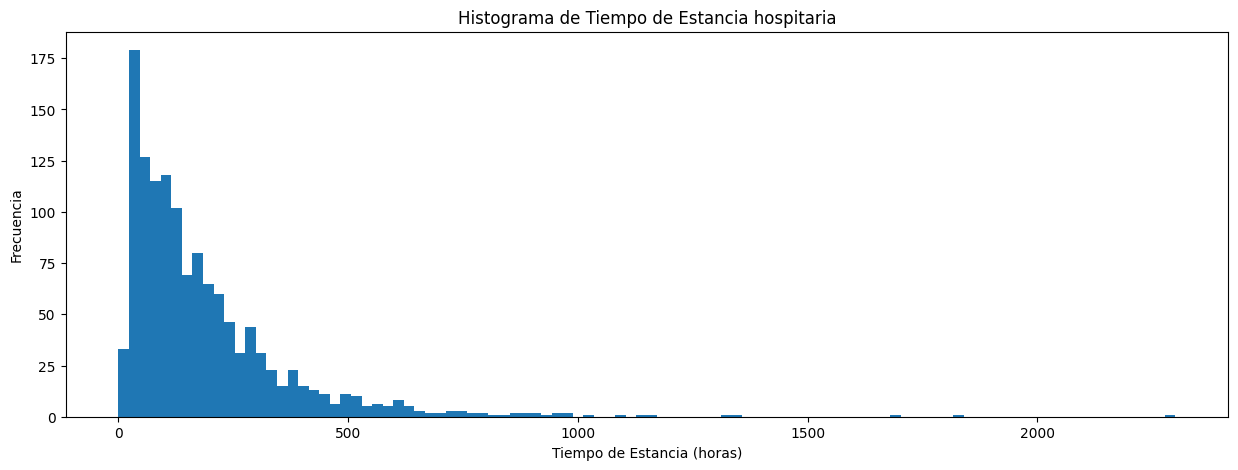

In [254]:
%matplotlib inline

# Se crea el histograma
plt.figure(figsize=(15, 5))
plt.hist(y['tiempo_estancia'], bins=100)
plt.title('Histograma de Tiempo de Estancia hospitaria')
plt.xlabel('Tiempo de Estancia (horas)')
plt.ylabel('Frecuencia')
plt.show()

In [255]:
print("El tiempo de estancia promedio es:", df_filtrado['tiempo_estancia'].mean(), "horas")

El tiempo de estancia promedio es: 188.38365012548263 horas


Hay personas que han permanecido en hospitalización más de 2000 horas. Es un dato bastante atípico pero se sabe que hay personas en delicado estado de salud que no pueden ser remitidos ni siquiera a medicina domiciliaria.

###**Análisis de las variables categóricas vs estancia hospitalaria**

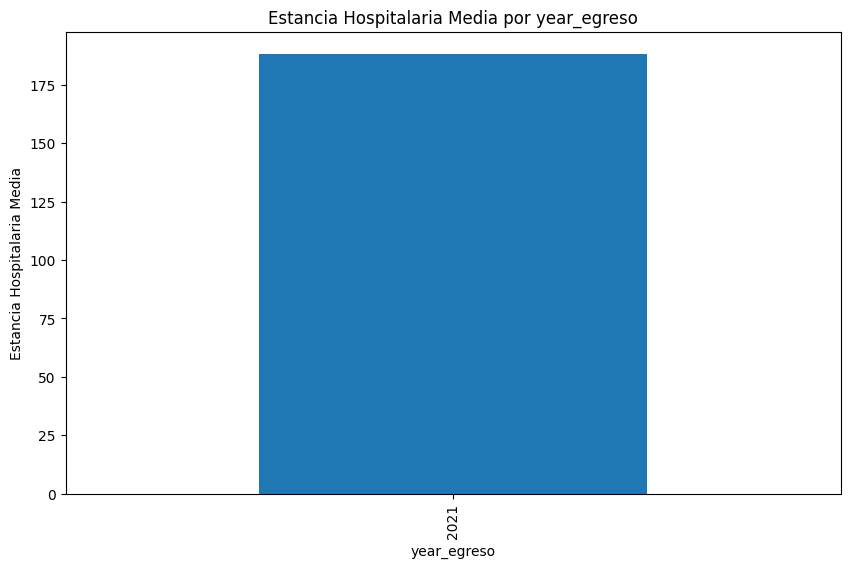

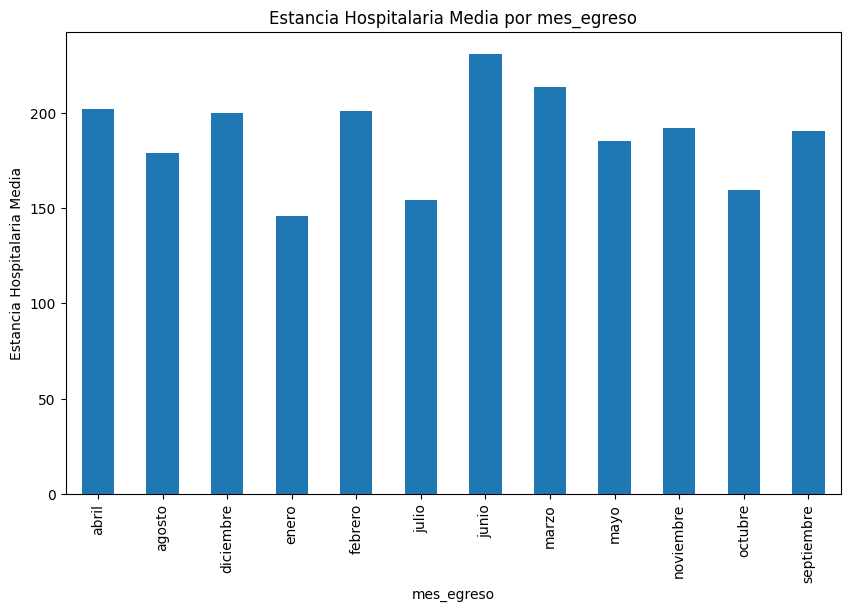

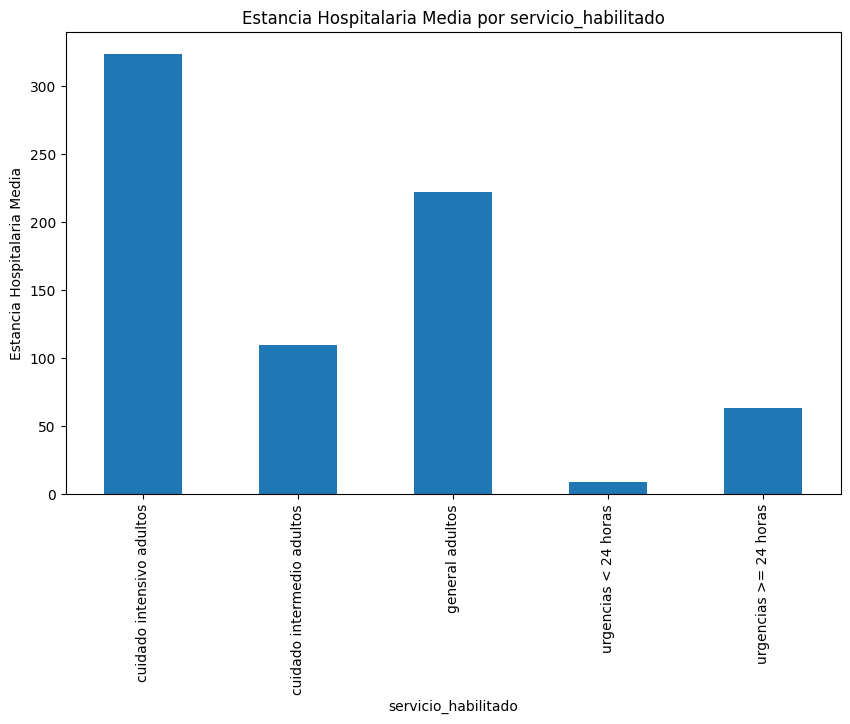

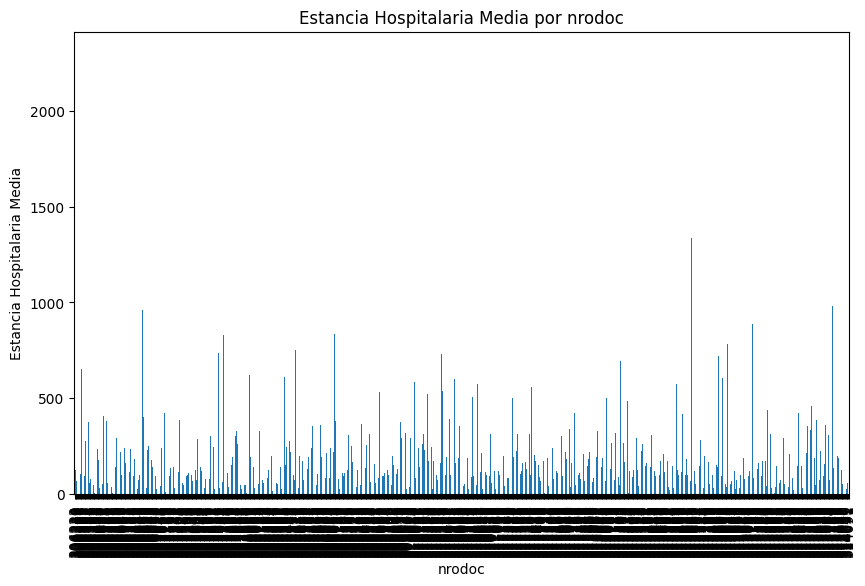

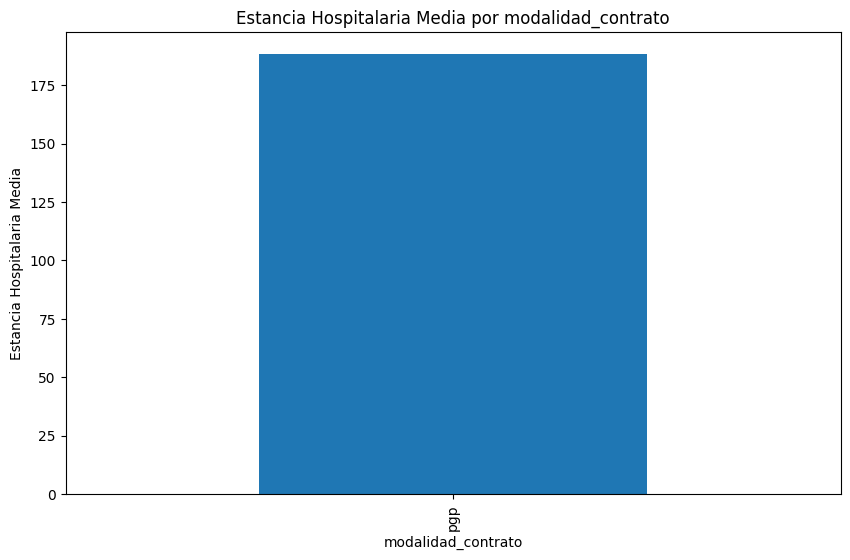

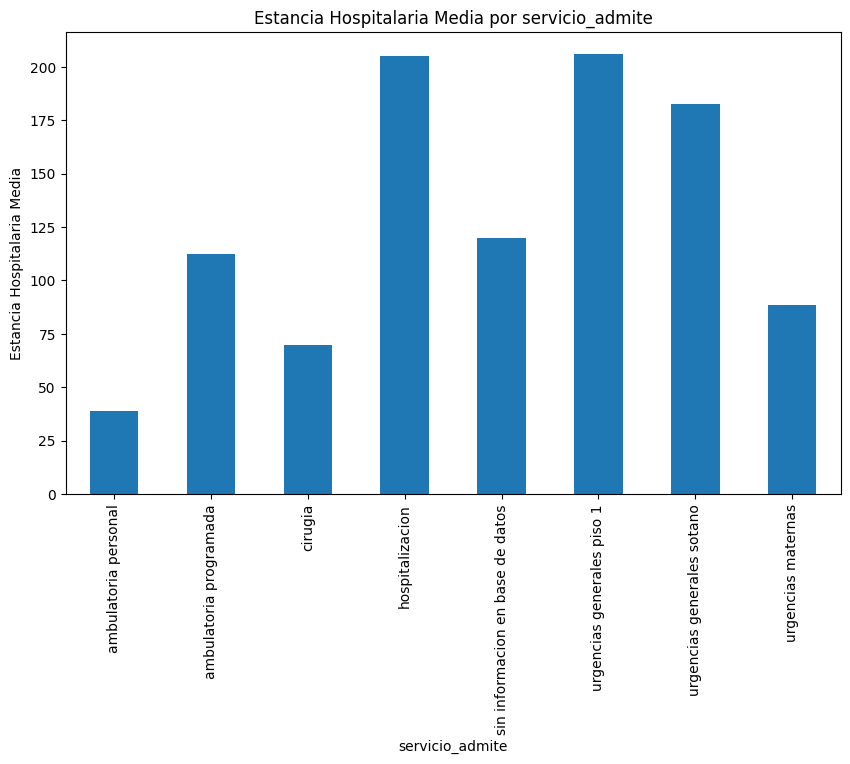

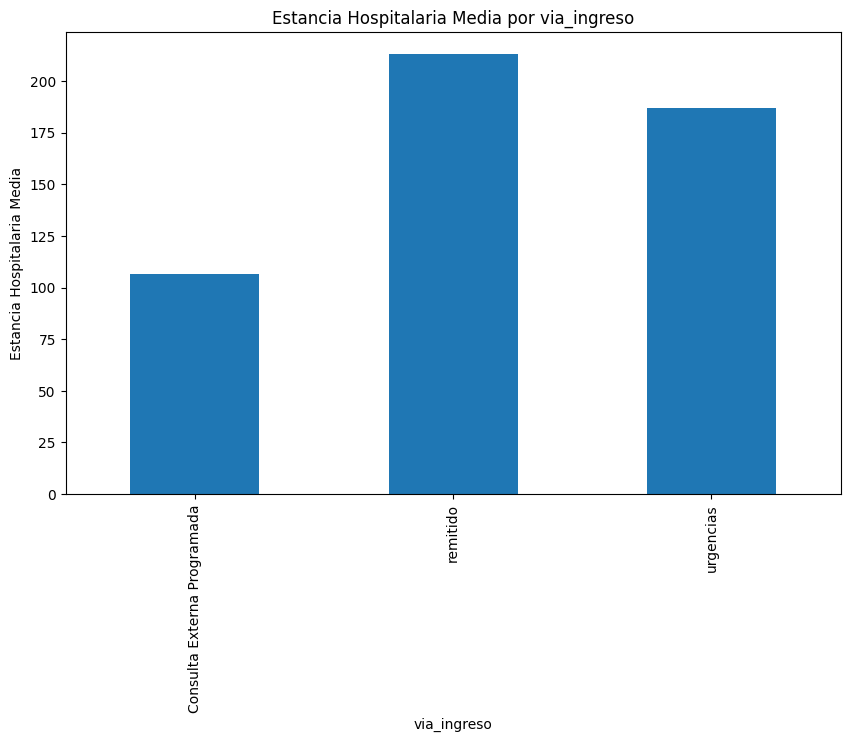

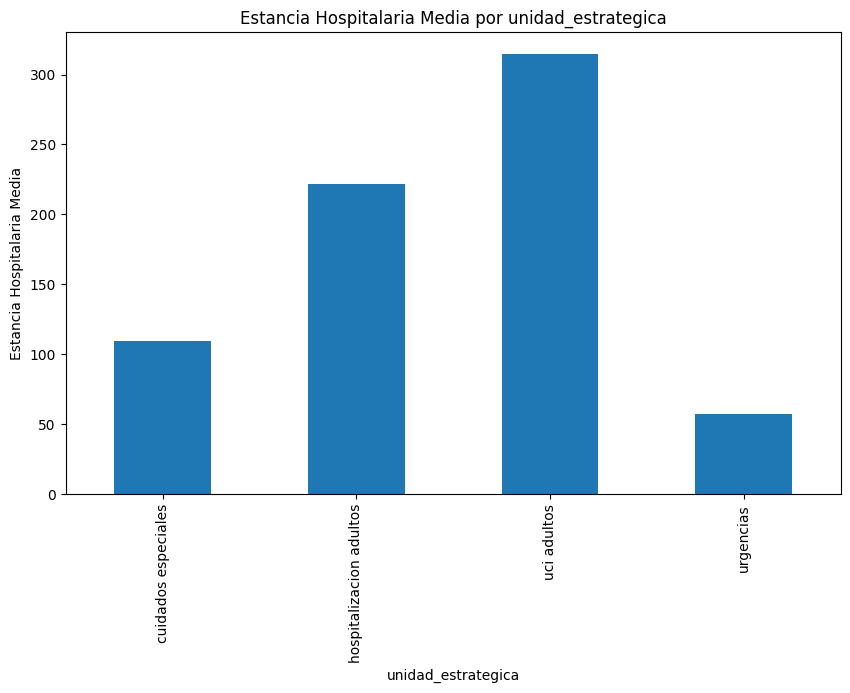

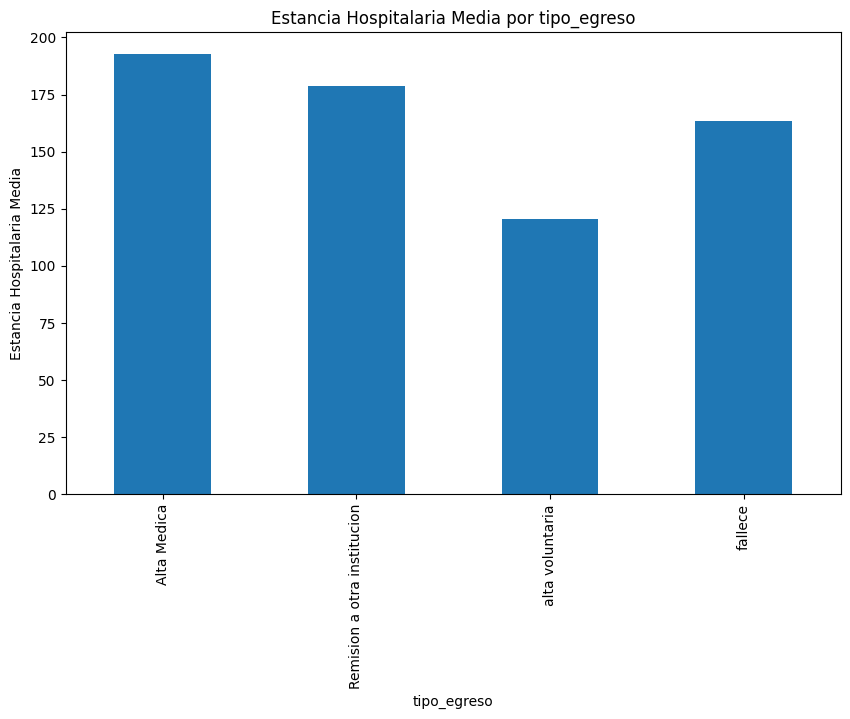

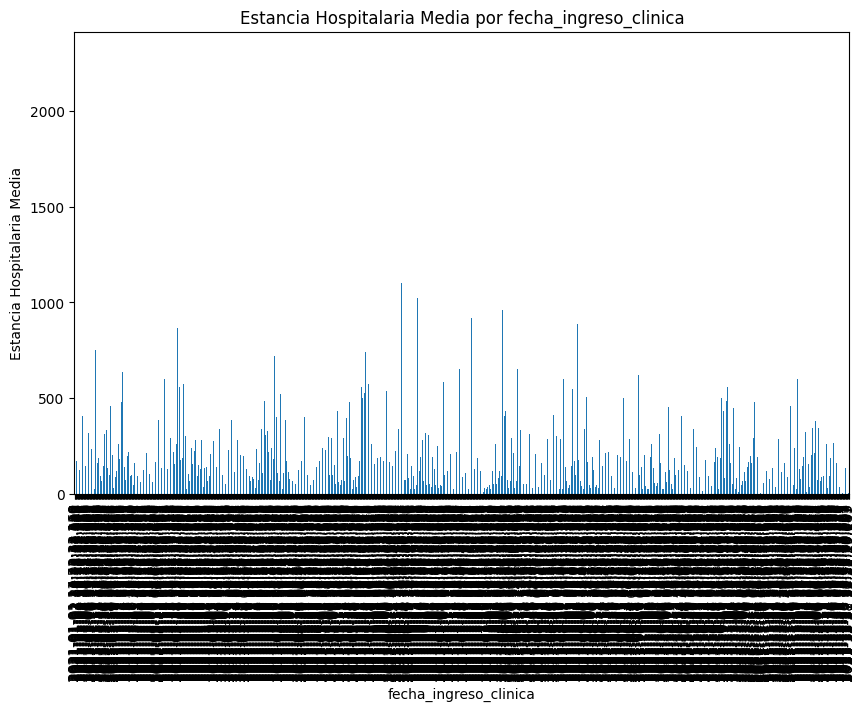

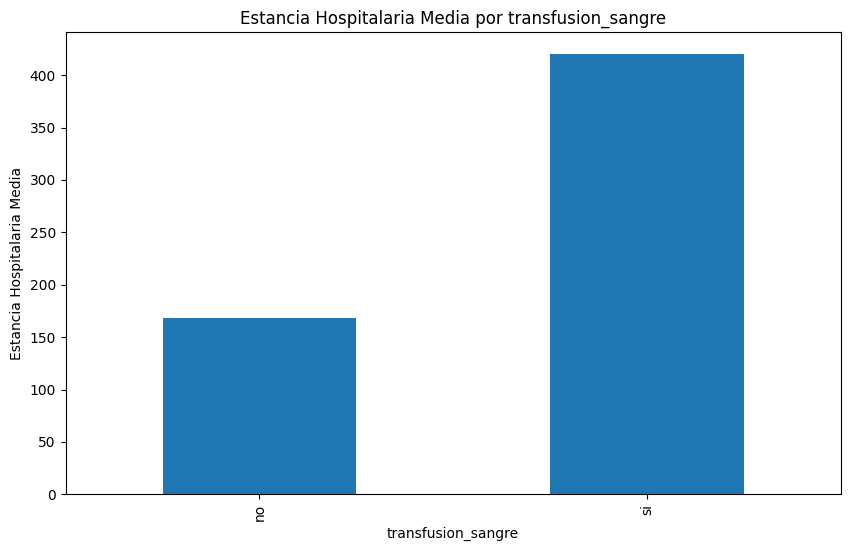

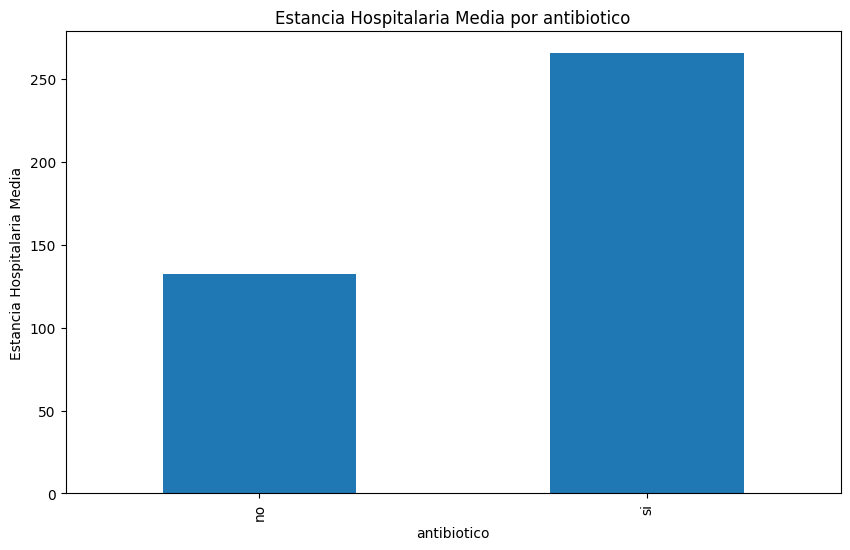

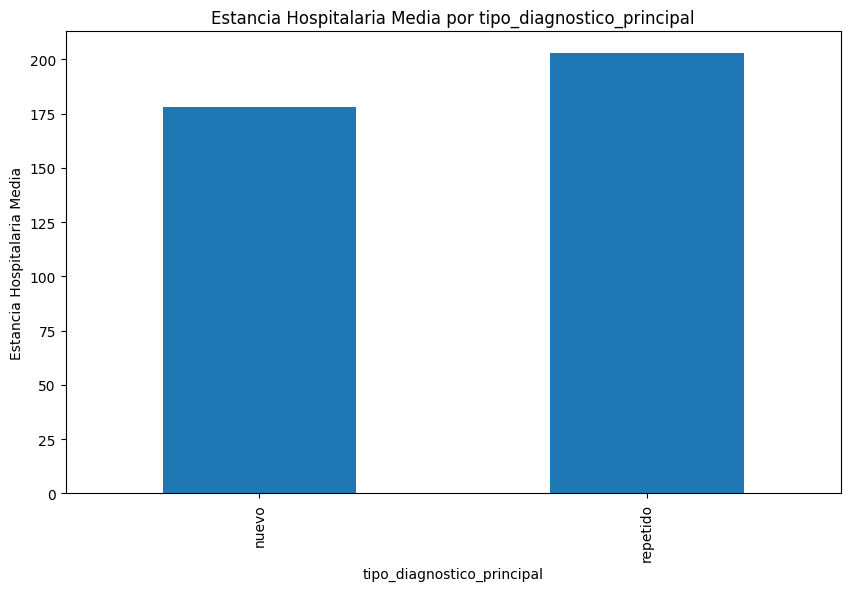

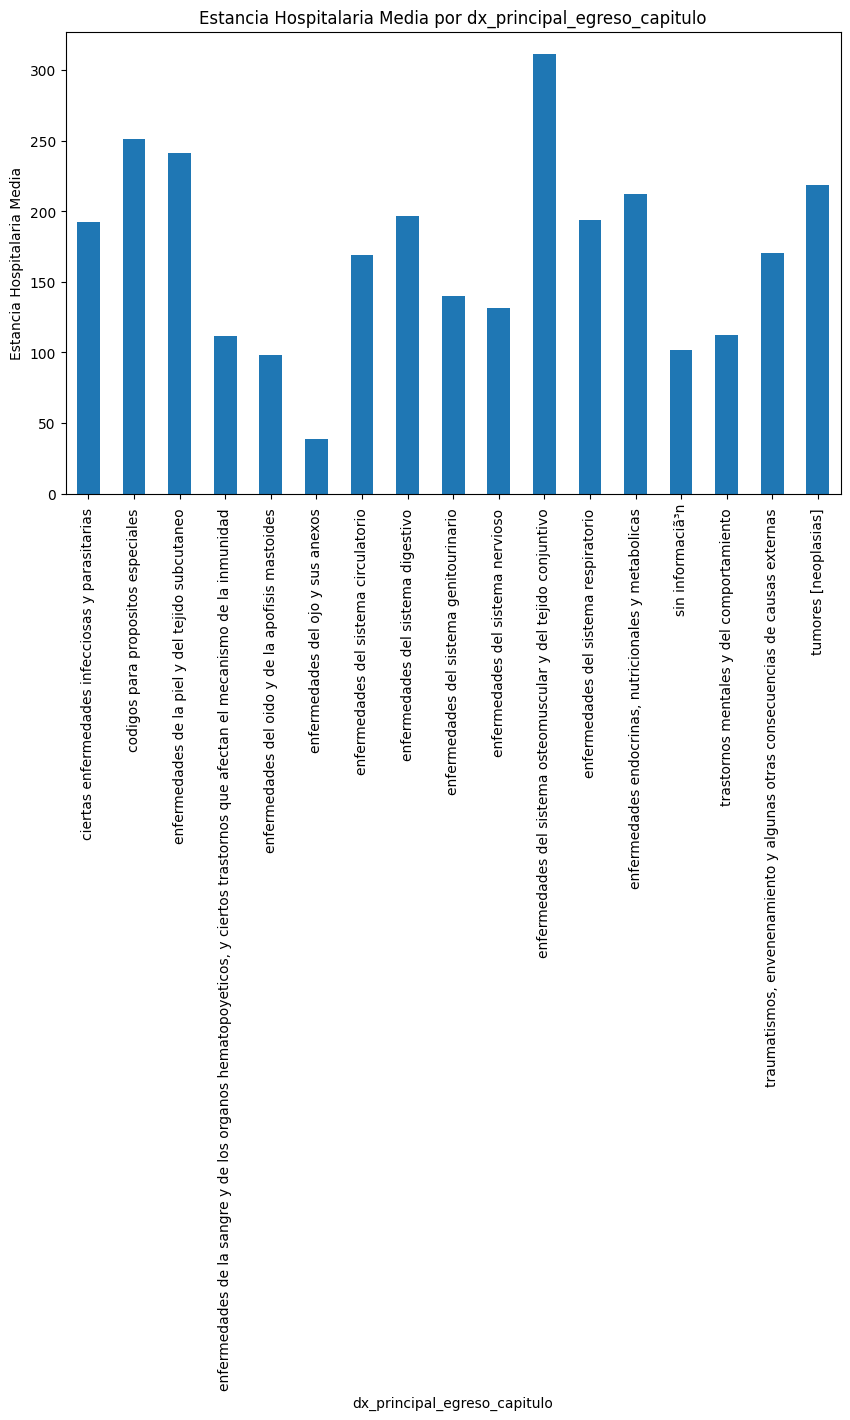

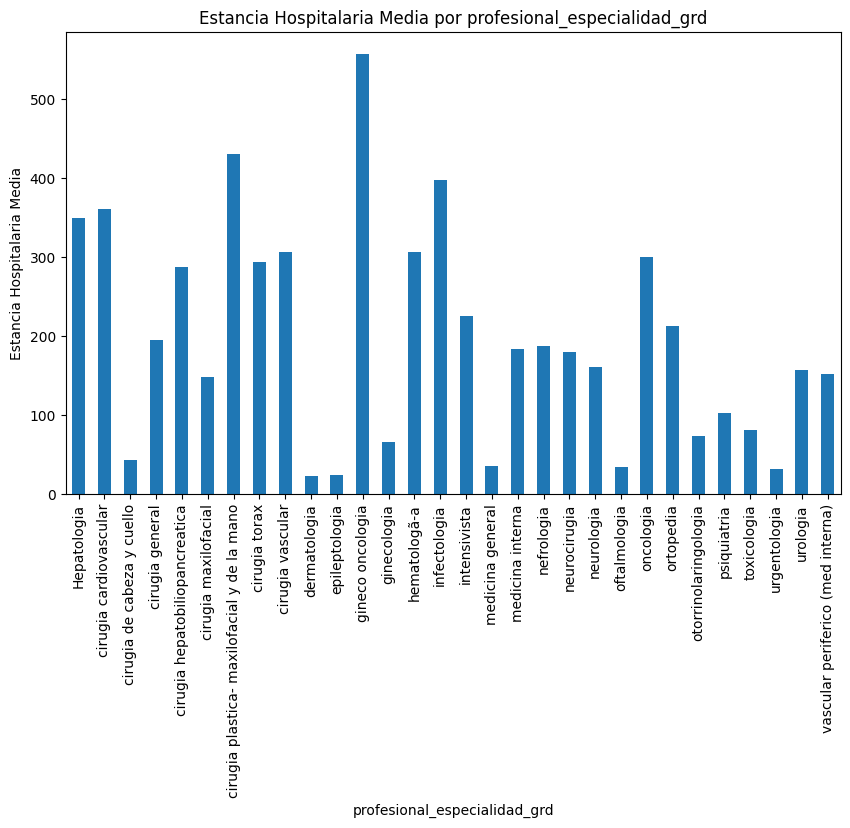

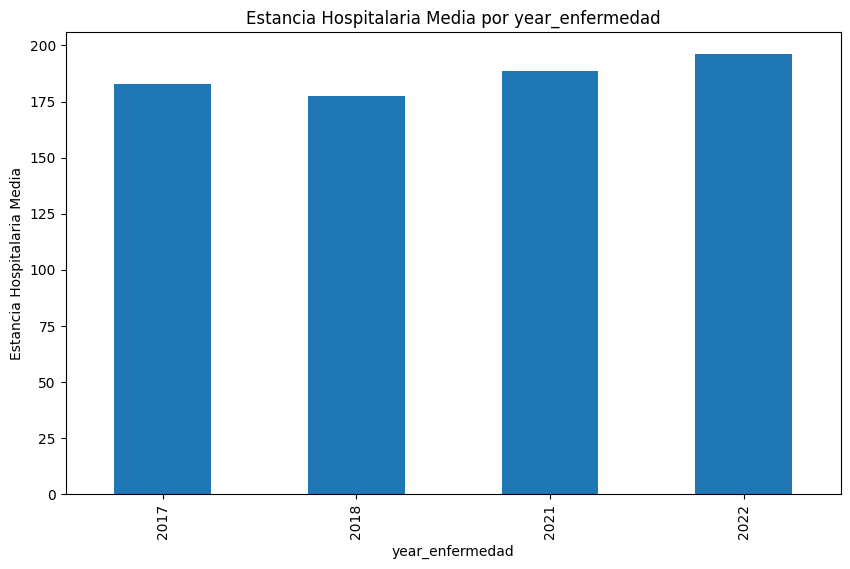

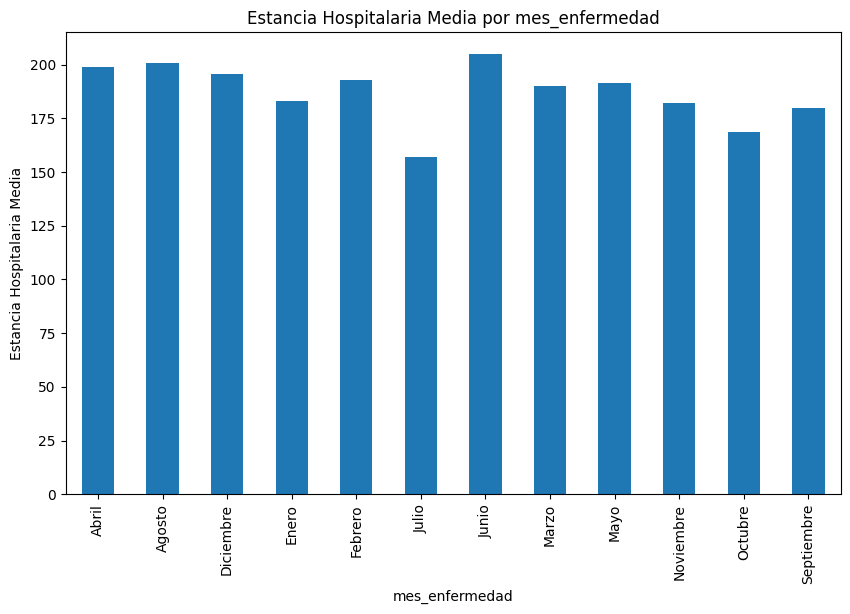

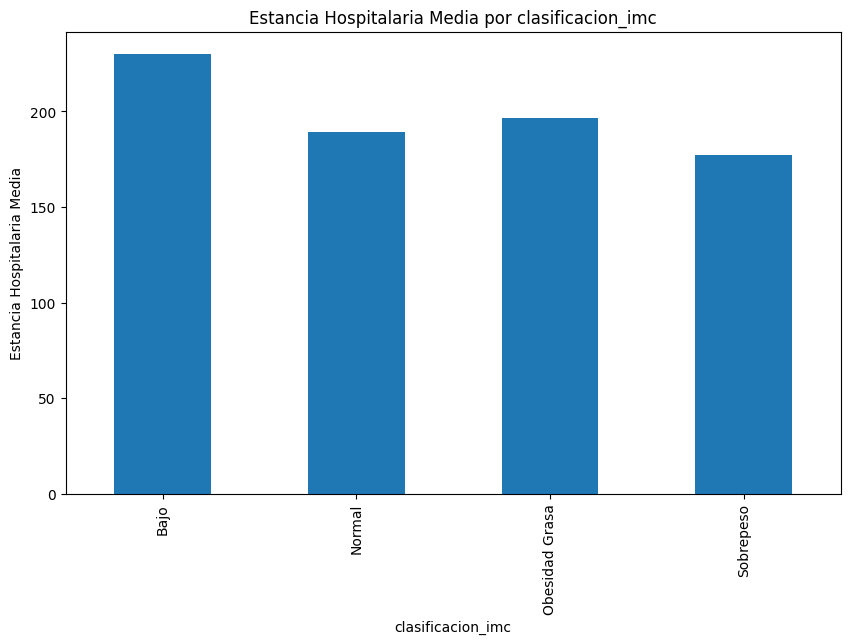

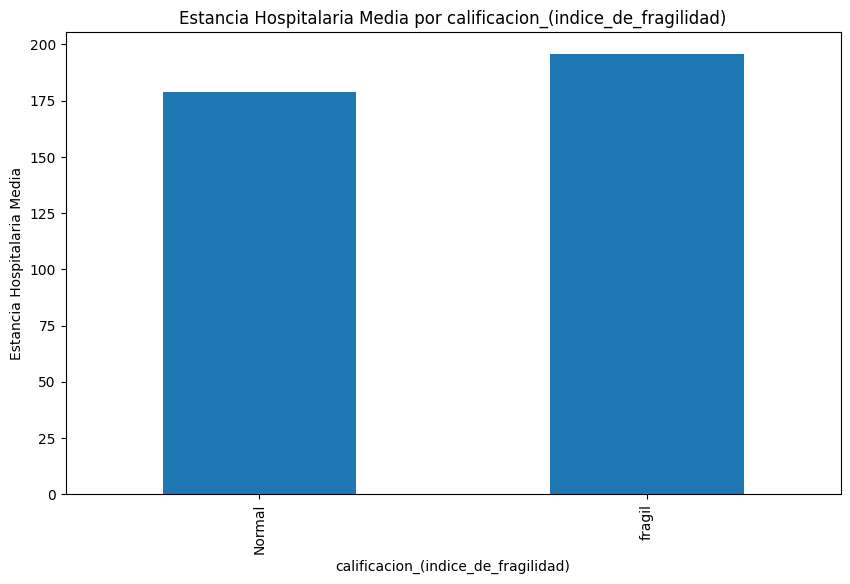

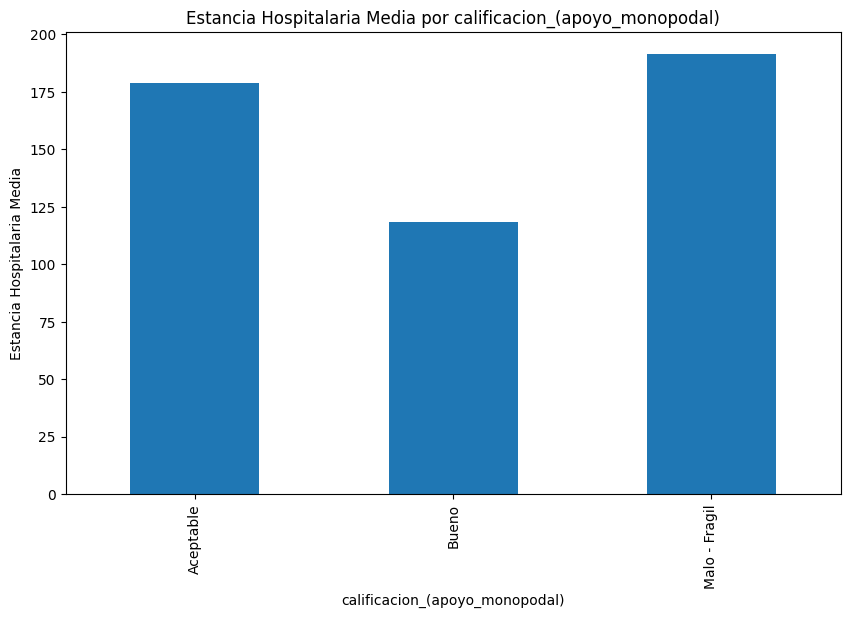

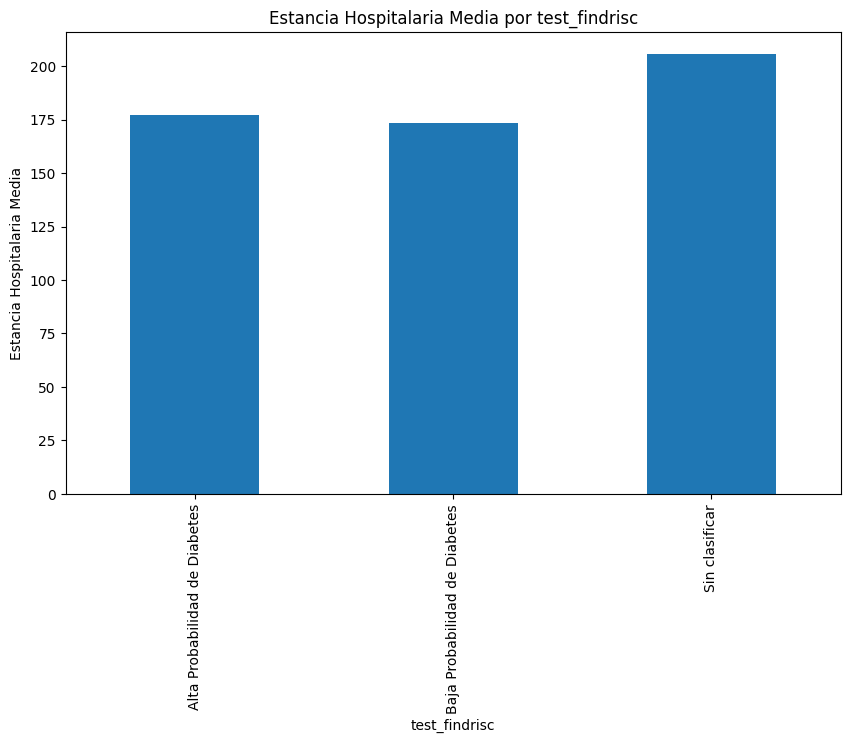

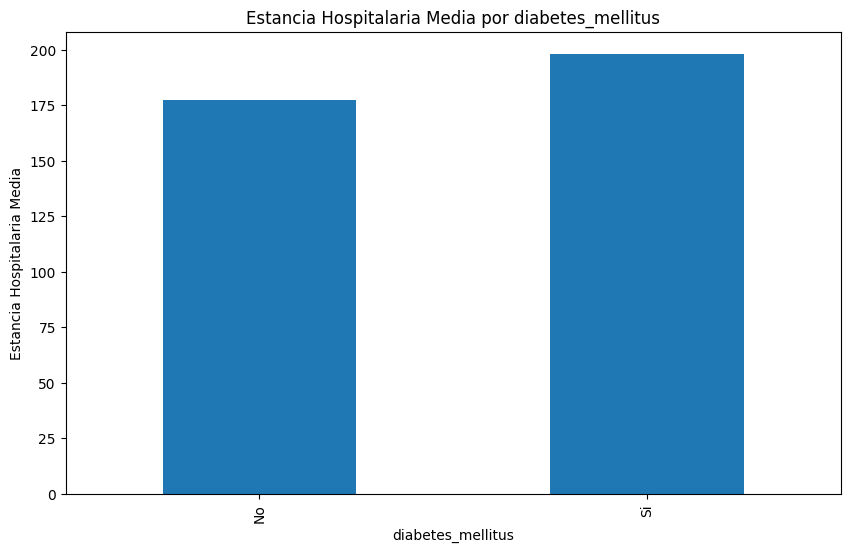

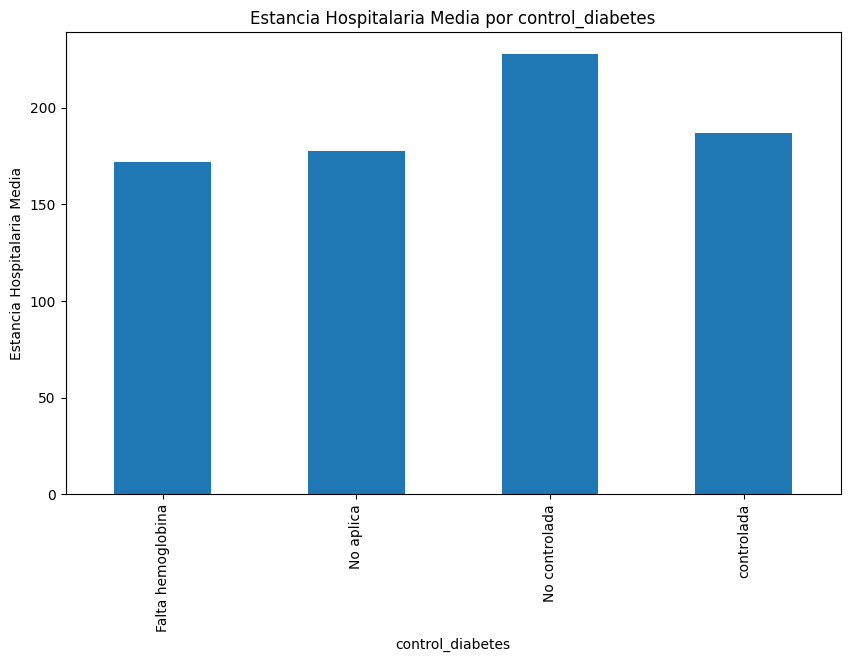

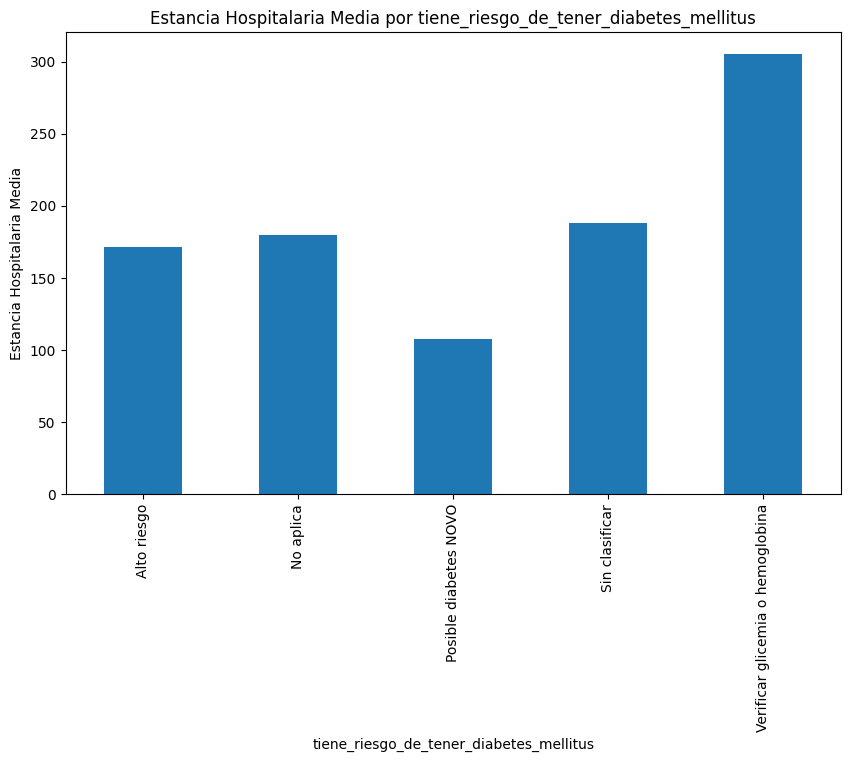

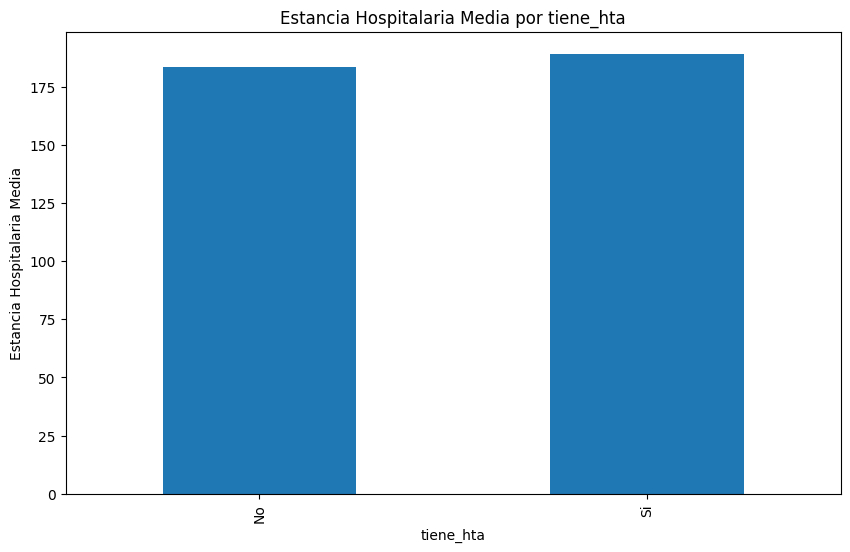

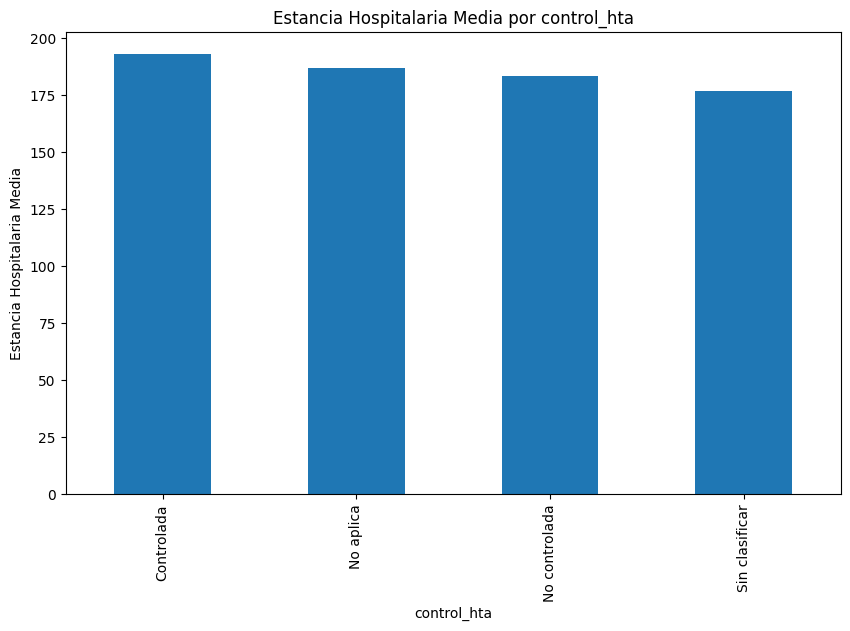

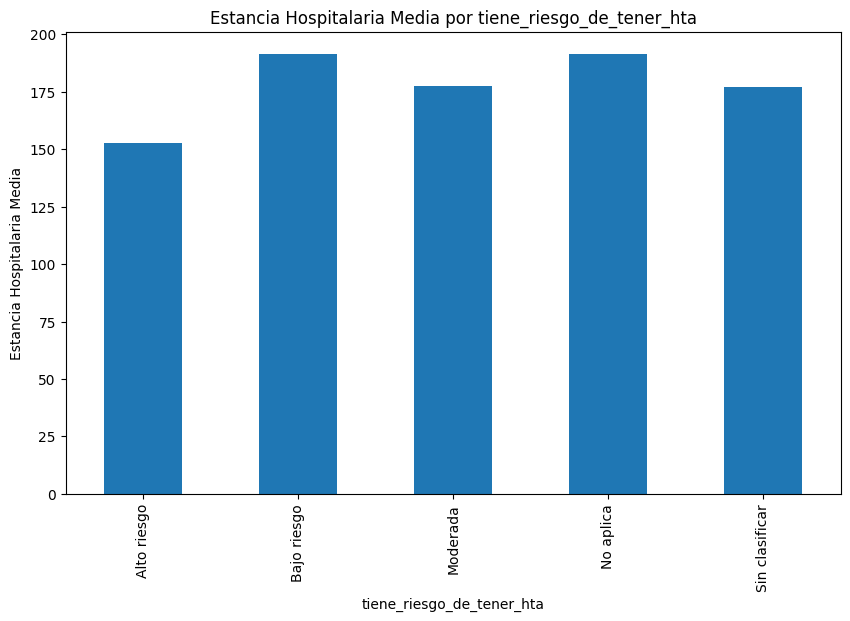

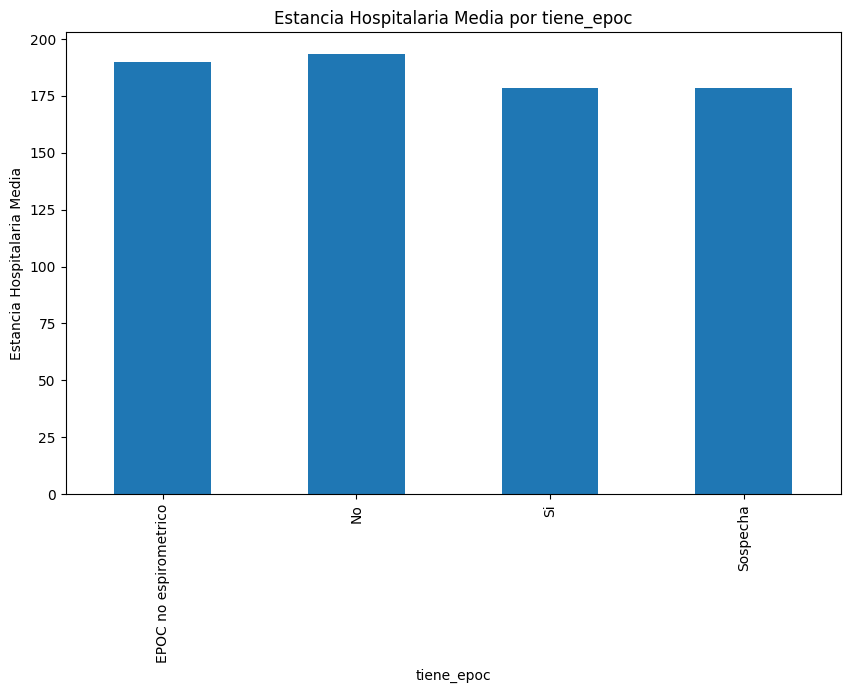

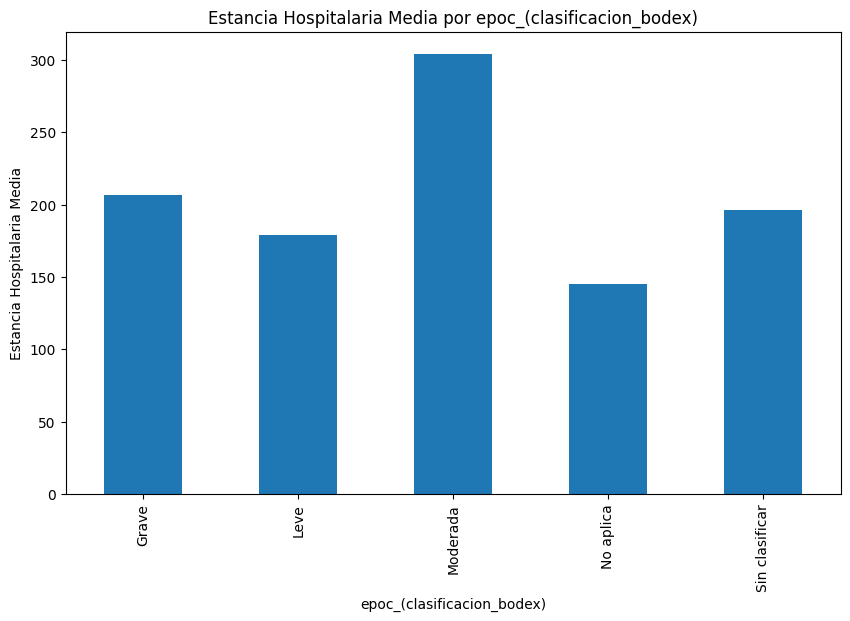

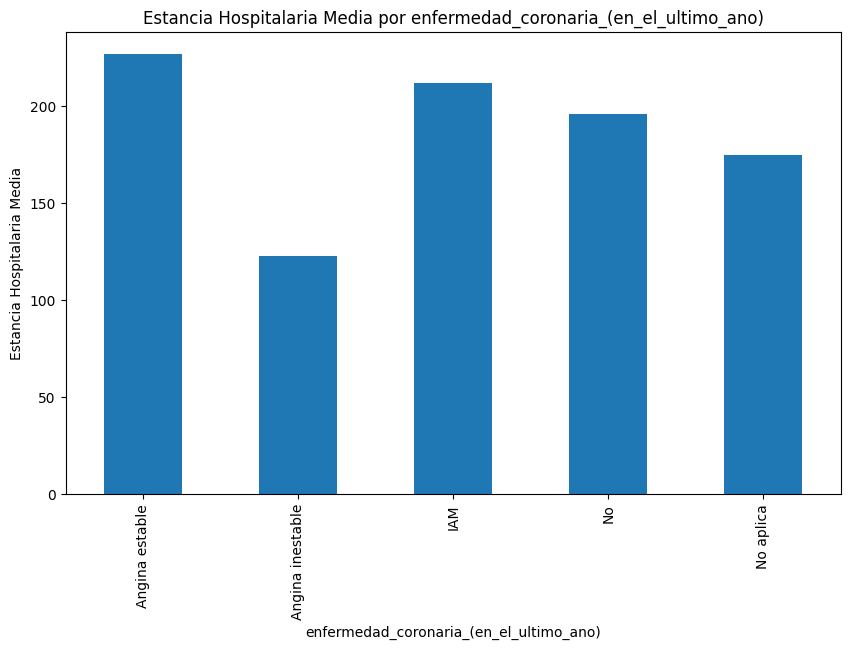

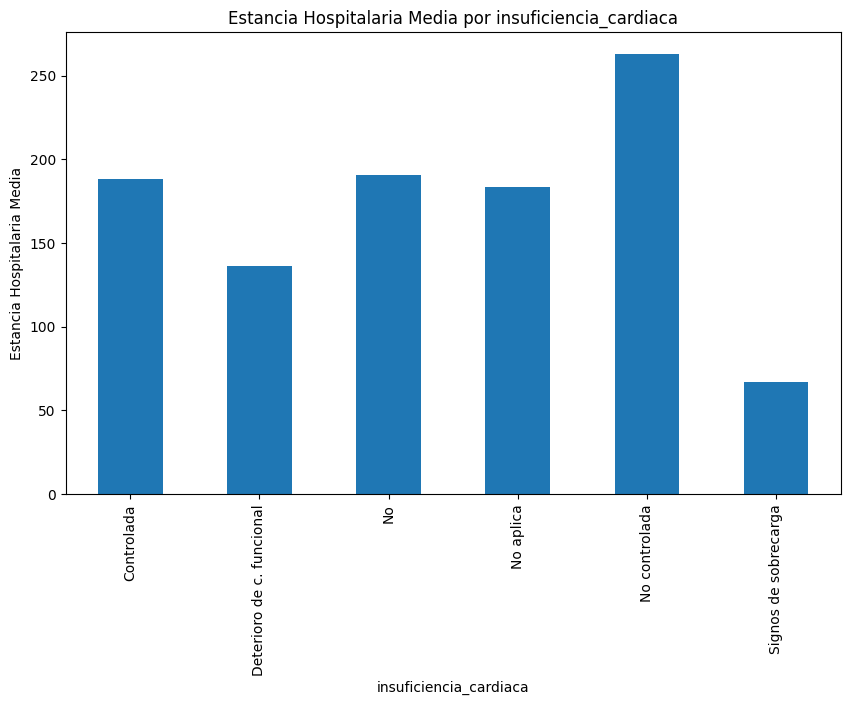

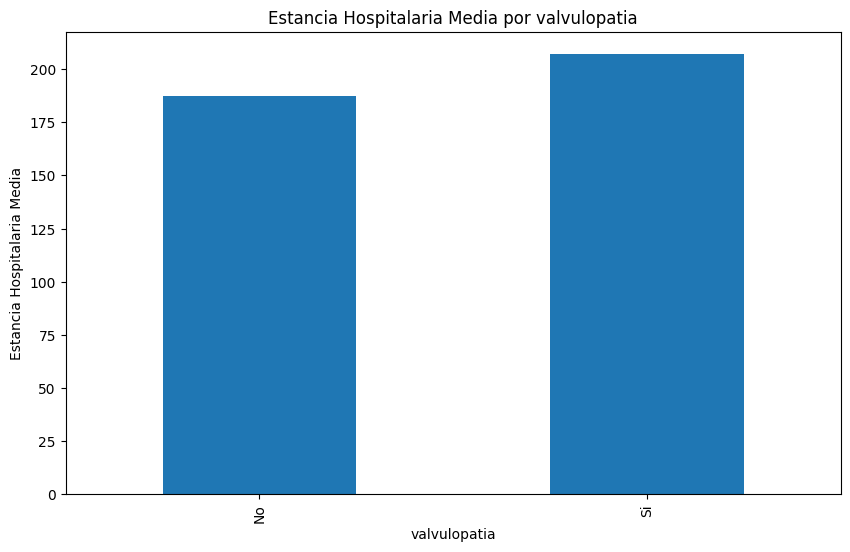

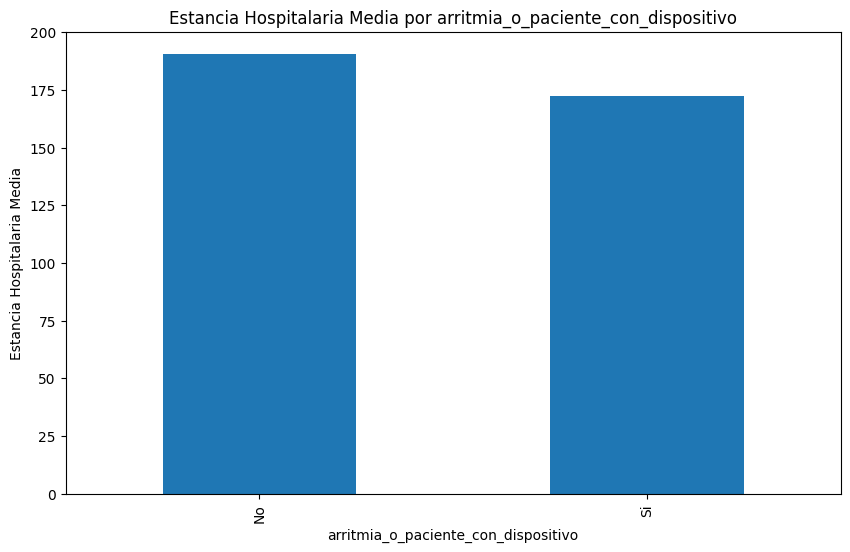

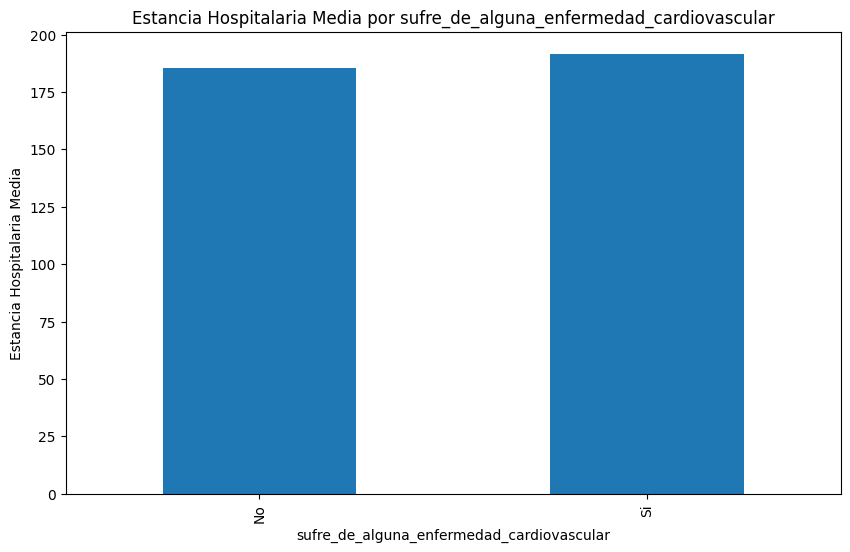

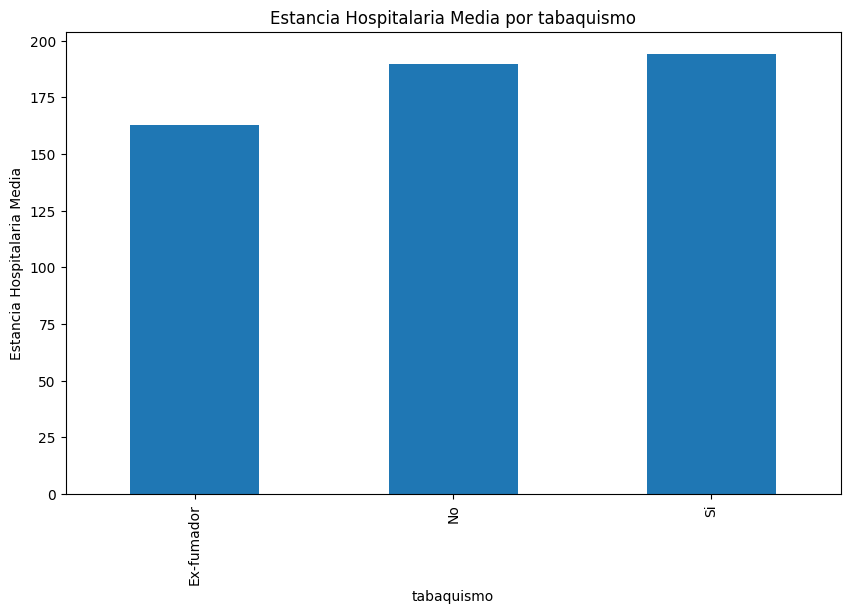

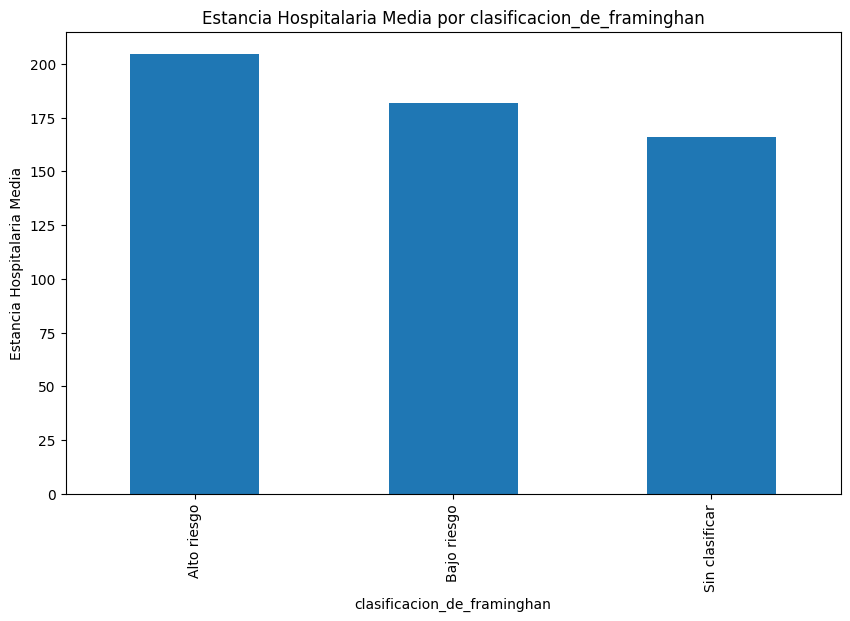

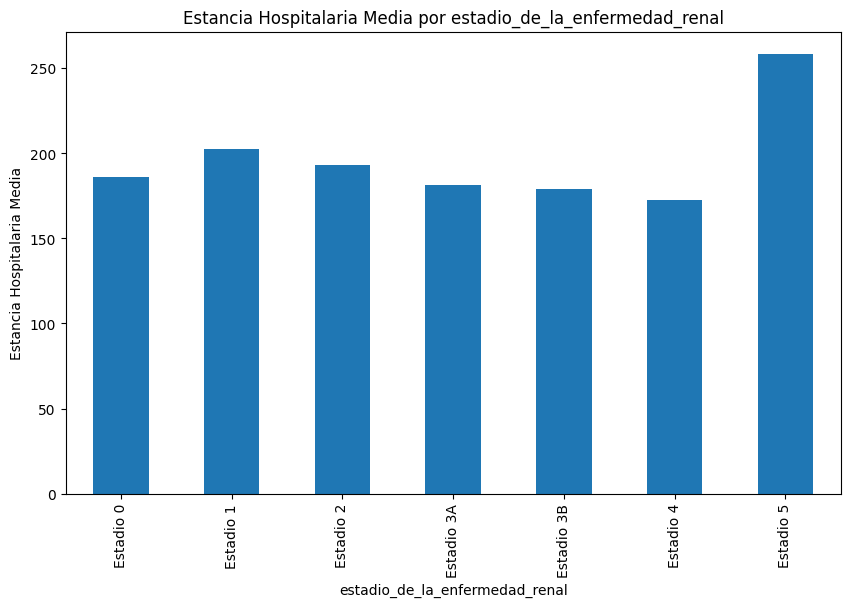

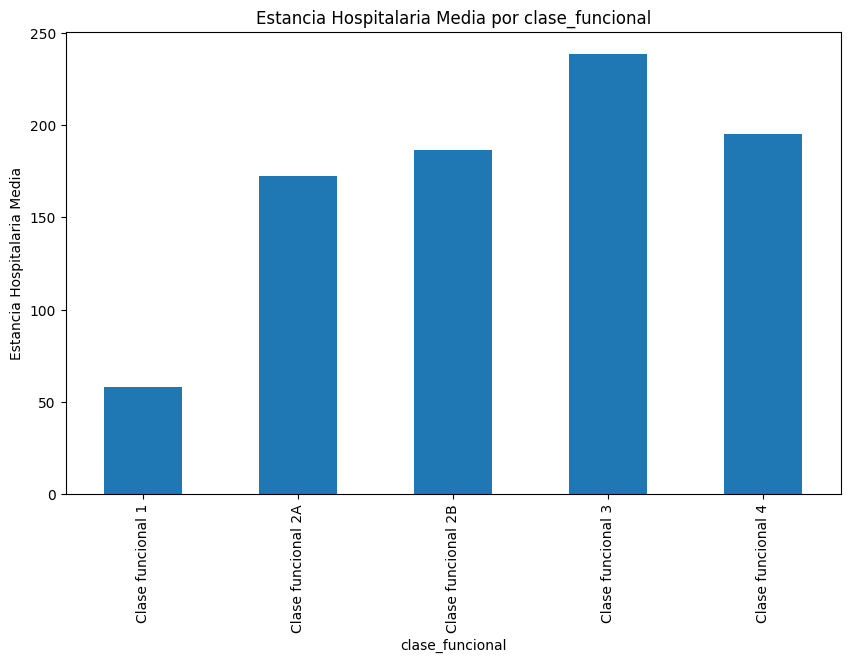

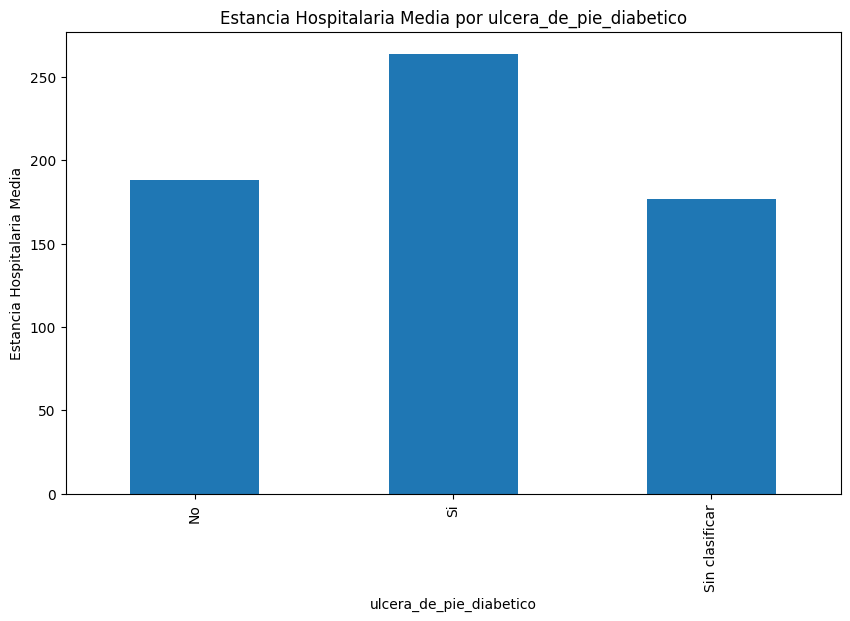

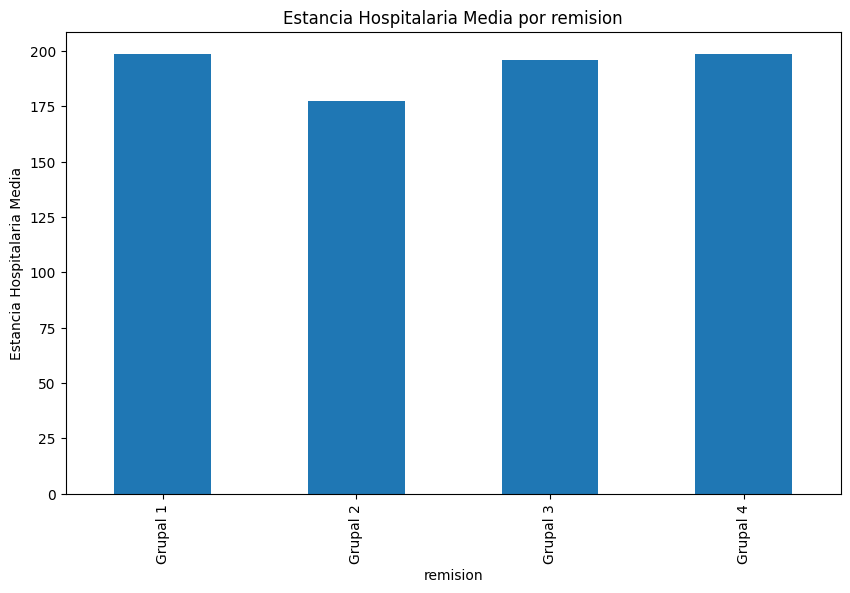

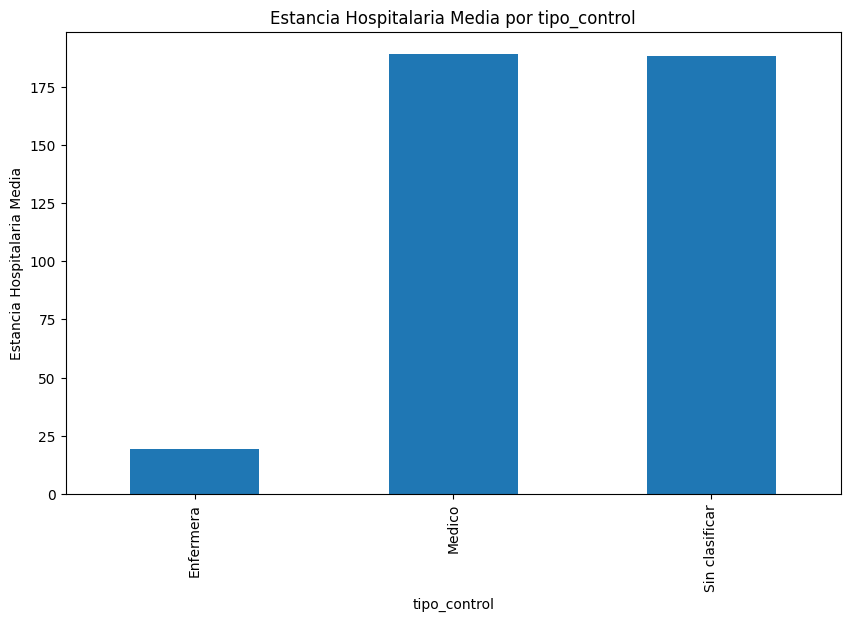

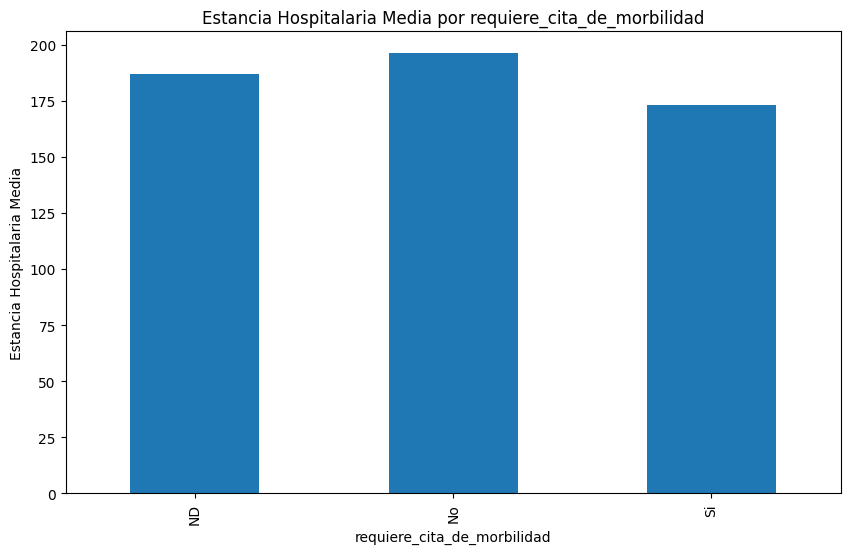

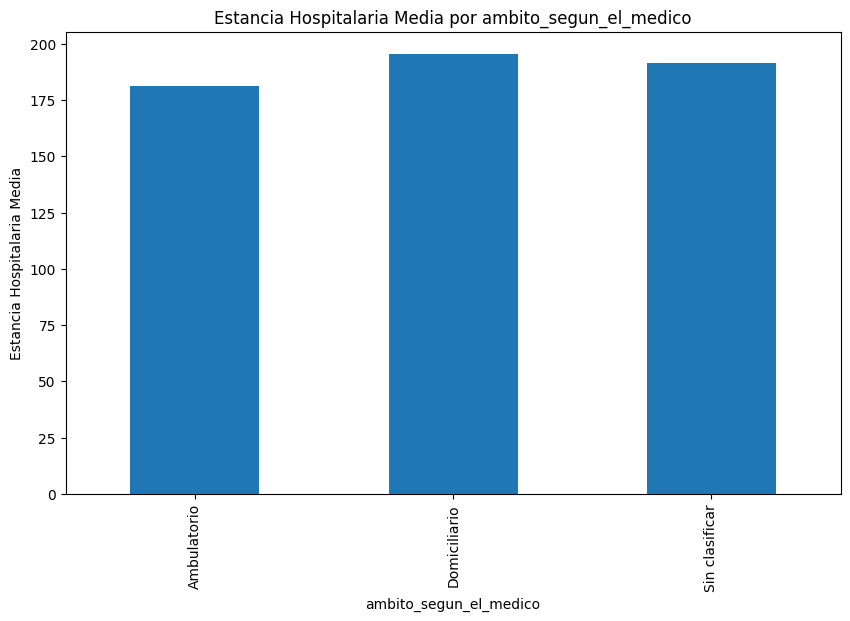

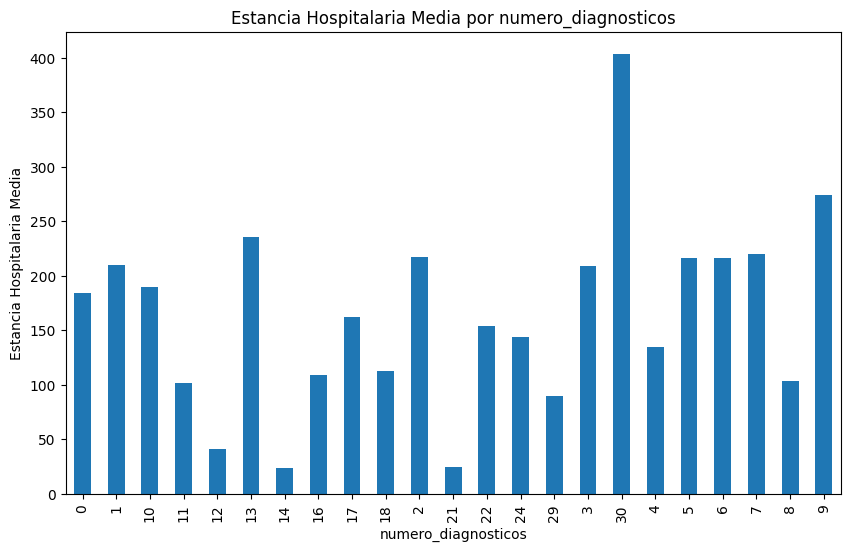

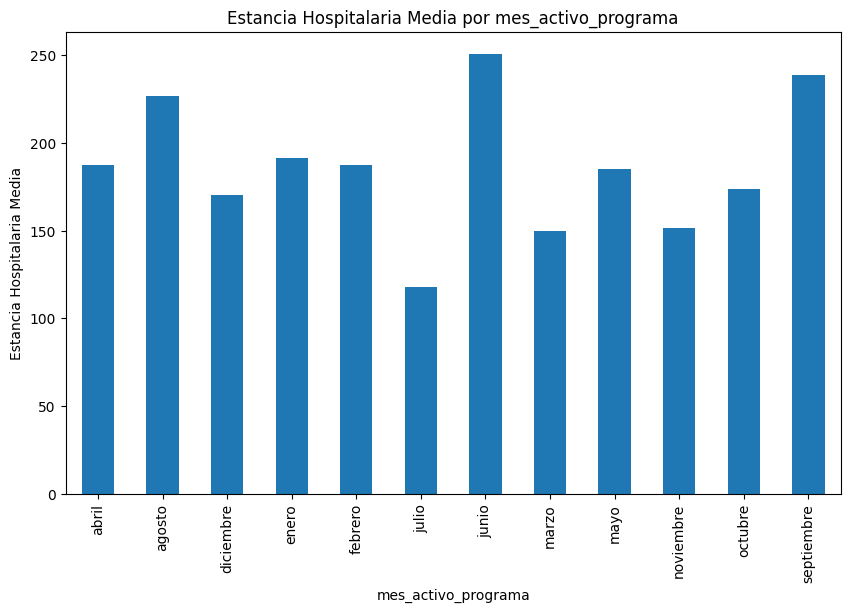

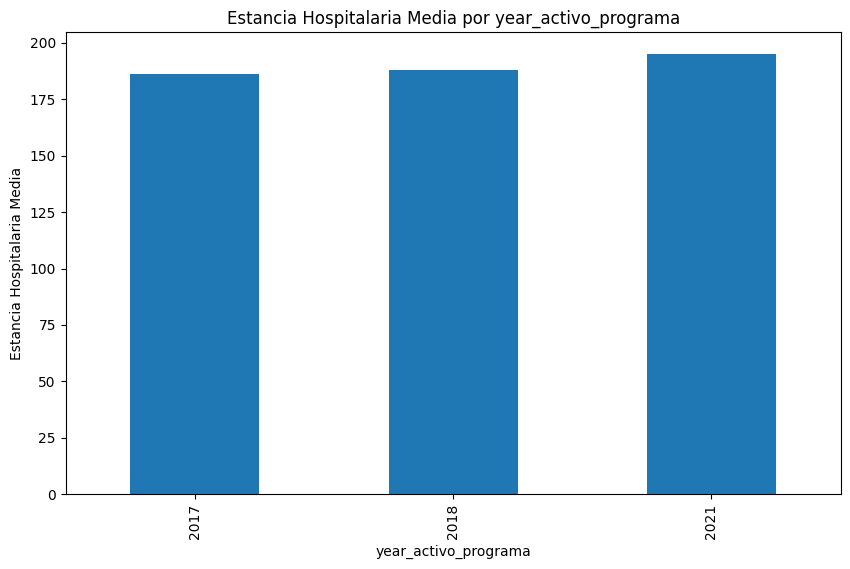

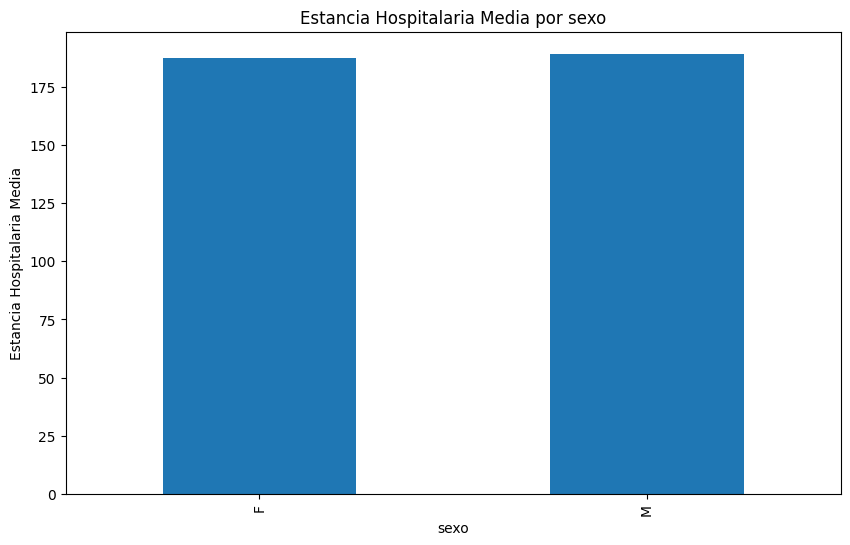

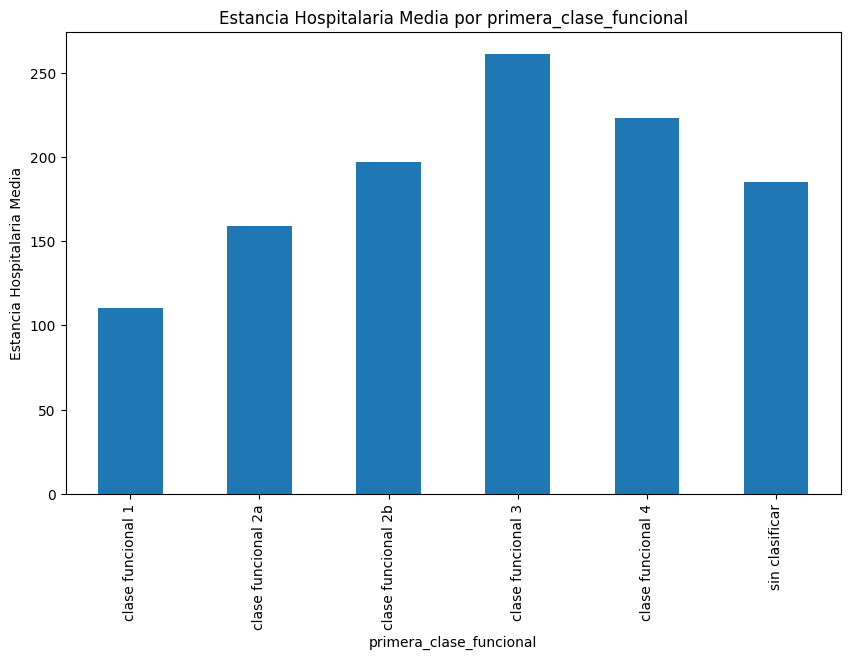

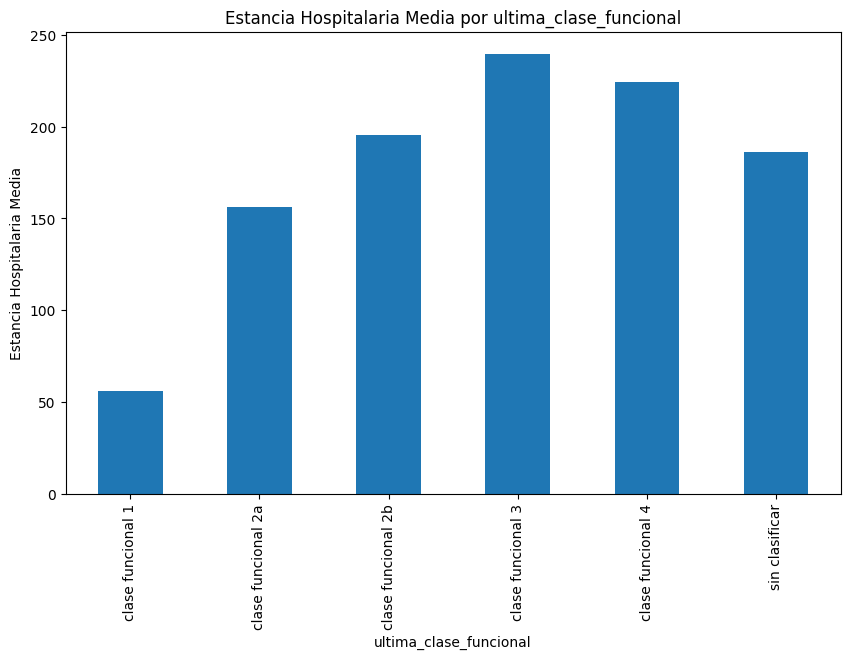

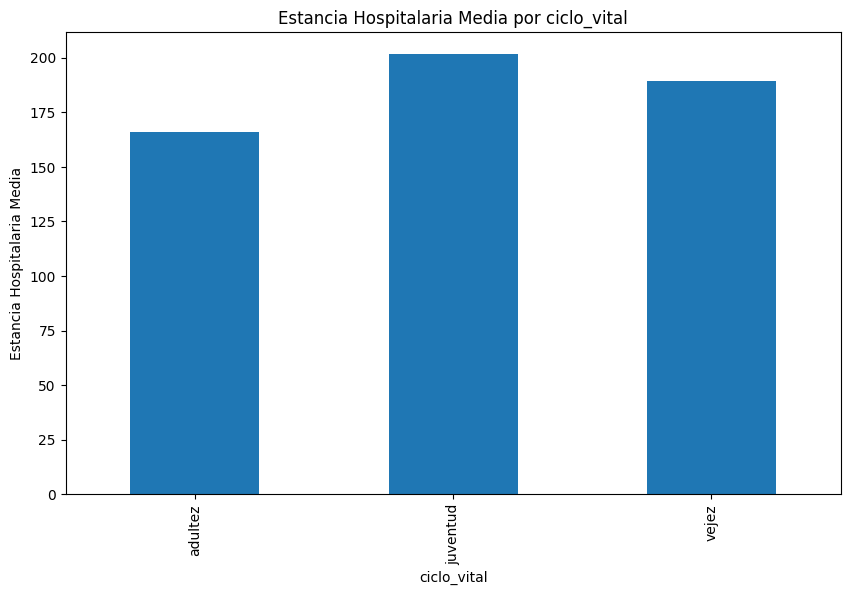

In [256]:
df_completo = pd.concat([categoricas, y], axis=1)

#Iteración a través de las columnas de 'categoricas' y creación de gráficos de barras para cada una
for columna in categoricas.columns:
    resultados = df_completo.groupby(columna)['tiempo_estancia'].mean()

    #Creación un gráfico de barras para visualizar los resultados
    resultados.plot(kind='bar', figsize=(10, 6))
    plt.title(f'Estancia Hospitalaria Media por {columna}')
    plt.xlabel(columna)
    plt.ylabel('Estancia Hospitalaria Media')
    plt.xticks(rotation=90)
    plt.show()

Nuevamente se hace caso omiso de las variables que son informativas en cuanto a datos del paciente y no tienen que ver con su diagnóstico como documento, fecha de ingreso, pgp, etc.

-Los adultos mayores en cuidados intensivos son los que permanecen más horas en hospitalización.

-Los números de horas de hospitalización más altos son los de los pacientes remitidos de otros centros asistenciales.

-Las principales razones del aumento de la estancia hospitalaria son transfusiones de sangre, suministro de medicamentos, imc bajo, insuficiencia cardíaca no controlada, enfermedad renal en estadio 5 y úlcera de pie diabético.

-Hay muchos diagnósticos entre los pacientes que representan muchas horas de estancia hospitalaria pero en primera instancia no parecen decisivas.


###**Análisis de variables numéricas vs estancia hospitalaria**

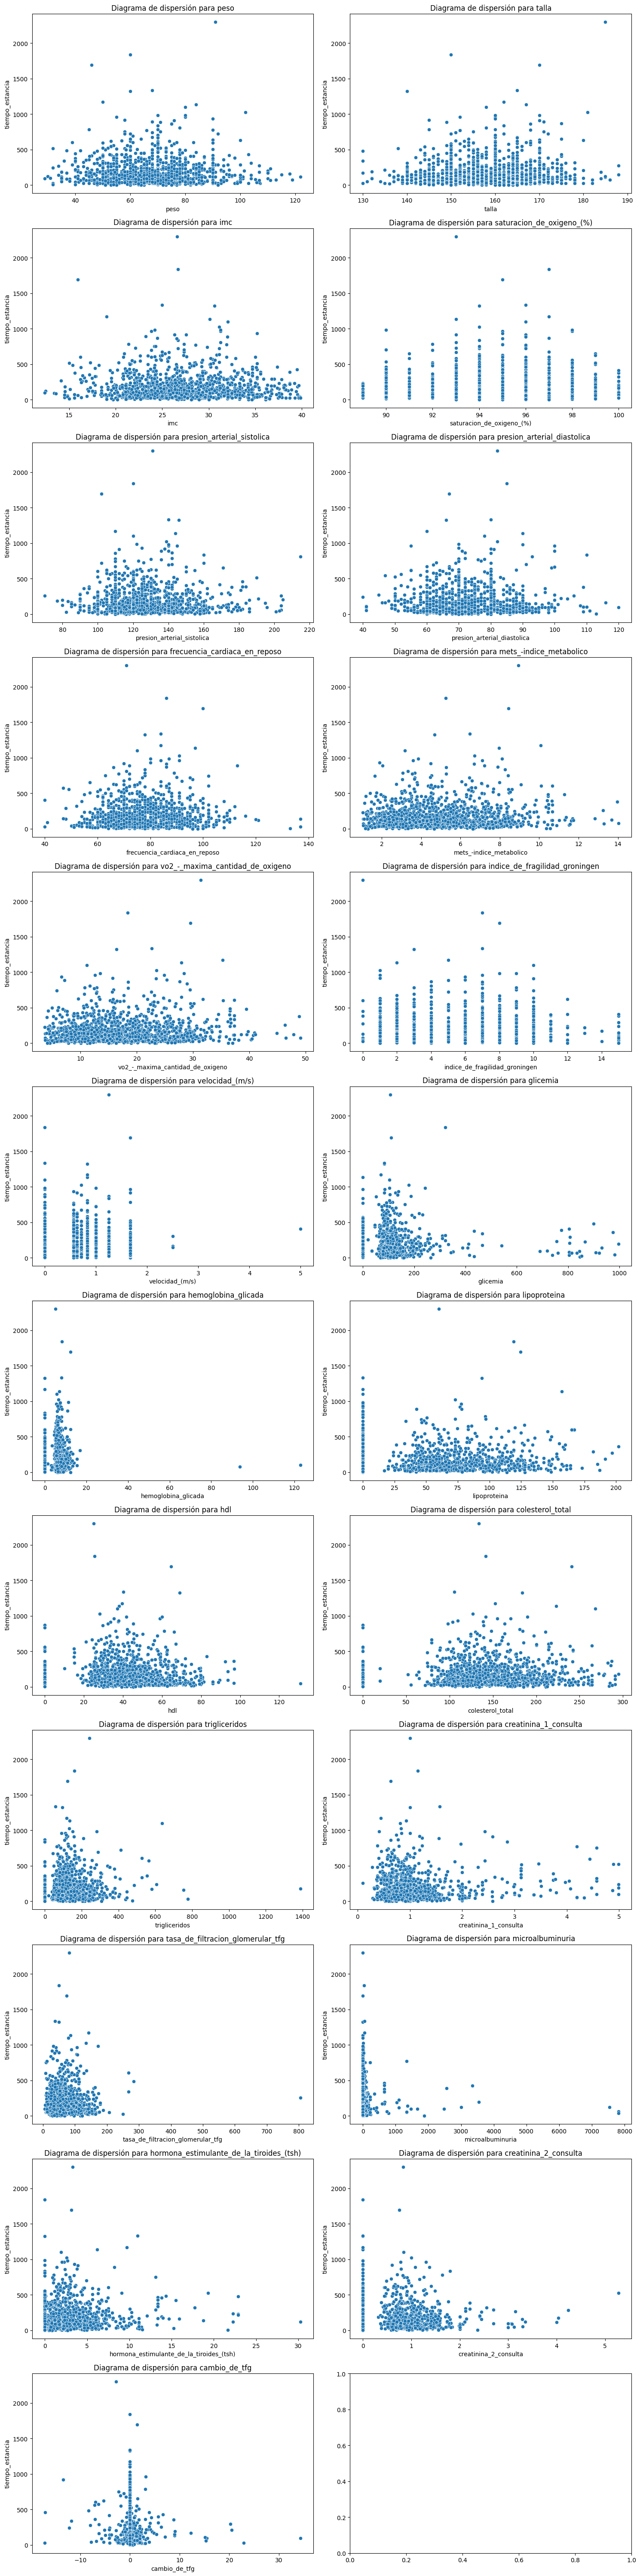

In [257]:
y2 = y.squeeze()
# Tamaño del gráfico
variables_numericas = numericas.columns  # Utiliza todas las variables numéricas

num_plots = len(variables_numericas)
num_plots_per_row = 2  # 2 gráficos por fila

# Cálculo el número de filas necesario
num_rows = (num_plots + num_plots_per_row - 1) // num_plots_per_row

# Iteración a través de las variables numéricas y crea diagramas de dispersión en subplots
fig, axs = plt.subplots(num_rows, num_plots_per_row, figsize=(15, 5*num_rows))

for i, variable in enumerate(variables_numericas):
    row, col = divmod(i, num_plots_per_row)
    sns.scatterplot(data=numericas, x=variable, y=y2, ax=axs[row, col])
    axs[row, col].set_title(f'Diagrama de dispersión para {variable}')

# Eliminación de cualquier subplot vacío si el número de gráficos no es un múltiplo exacto de num_plots_per_row
if i < num_plots_per_row - 1:
    for j in range(i + 1, num_plots_per_row):
        fig.delaxes(axs[row, j])

plt.tight_layout()
plt.show()

No se notan tendencias en ninguno de los gráficos por lo que se concluye que la información de las variables numéricas conserva cierta aleatoriedad.


In [262]:
#Consulta para observar las variables numéricas preseleccionadas
numericas.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1295 entries, 0 to 1497
Data columns (total 23 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   peso                                      1295 non-null   float64
 1   talla                                     1295 non-null   float64
 2   imc                                       1295 non-null   float64
 3   saturacion_de_oxigeno_(%)                 1295 non-null   float64
 4   presion_arterial_sistolica                1295 non-null   int64  
 5   presion_arterial_diastolica               1295 non-null   int64  
 6   frecuencia_cardiaca_en_reposo             1295 non-null   int64  
 7   mets_-indice_metabolico                   1295 non-null   float64
 8   vo2_-_maxima_cantidad_de_oxigeno          1295 non-null   float64
 9   indice_de_fragilidad_groningen            1295 non-null   float64
 10  velocidad_(m/s)                          

In [261]:
#Consulta para observar las variables categóricas preseleccionadas
categoricas.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1295 entries, 0 to 1497
Data columns (total 50 columns):
 #   Column                                     Non-Null Count  Dtype 
---  ------                                     --------------  ----- 
 0   year_egreso                                1295 non-null   object
 1   mes_egreso                                 1295 non-null   object
 2   servicio_habilitado                        1295 non-null   object
 3   nrodoc                                     1295 non-null   object
 4   modalidad_contrato                         1295 non-null   object
 5   servicio_admite                            1295 non-null   object
 6   via_ingreso                                1295 non-null   object
 7   unidad_estrategica                         1295 non-null   object
 8   tipo_egreso                                1295 non-null   object
 9   fecha_ingreso_clinica                      1295 non-null   object
 10  transfusion_sangre                       

In [263]:
# Se convierte a CSV
numericas.to_csv('/content/drive/MyDrive/analitica3/Salud/numericas.csv', index=True)
categoricas.to_csv('/content/drive/MyDrive/analitica3/Salud/categoricas.csv', index=True)